Yedupati Venkata Yamini - Forecasting Project code notebook

In [215]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#time series related libraries
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [216]:
#1. Read the data as an appropriate Time Series data and plot the data.

In [217]:
sparkling_data = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'])

In [218]:
sparkling_data.head()

YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471

In [219]:
sparkling_data.tail()

YearMonth  Sparkling
182 1995-03-01       1897
183 1995-04-01       1862
184 1995-05-01       1670
185 1995-06-01       1688
186 1995-07-01       2031

In [220]:
sparkling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Sparkling  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [221]:
date = pd.date_range(start='1/1/1980', end='7/1/1995', freq='MS')
date

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [222]:
sparkling_data['Year'] = date.year
sparkling_data['Month'] = date.month

In [223]:
import calendar
sparkling_data['Month'] = sparkling_data['Month'].apply(lambda x : calendar.month_abbr[x])

In [224]:
sparkling_data.head()

YearMonth  Sparkling  Year Month
0 1980-01-01       1686  1980   Jan
1 1980-02-01       1591  1980   Feb
2 1980-03-01       2304  1980   Mar
3 1980-04-01       1712  1980   Apr
4 1980-05-01       1471  1980   May

In [225]:
sparkling_data.set_index('YearMonth', drop = True, inplace = True)

In [226]:
sparkling_data.head()

Sparkling  Year Month
YearMonth                        
1980-01-01       1686  1980   Jan
1980-02-01       1591  1980   Feb
1980-03-01       2304  1980   Mar
1980-04-01       1712  1980   Apr
1980-05-01       1471  1980   May

In [227]:
sparkling_data.tail()

Sparkling  Year Month
YearMonth                        
1995-03-01       1897  1995   Mar
1995-04-01       1862  1995   Apr
1995-05-01       1670  1995   May
1995-06-01       1688  1995   Jun
1995-07-01       2031  1995   Jul

In [228]:
sparkling_data.shape

(187, 3)

In [229]:
sparkling_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sparkling  187 non-null    int64 
 1   Year       187 non-null    int64 
 2   Month      187 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.8+ KB


In [230]:
sparkling_data['Sparkling'].describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

In [231]:
sparkling_data['Sparkling'].isnull().sum()

0

Text(0.5, 1.0, 'Sparkling wine sales')

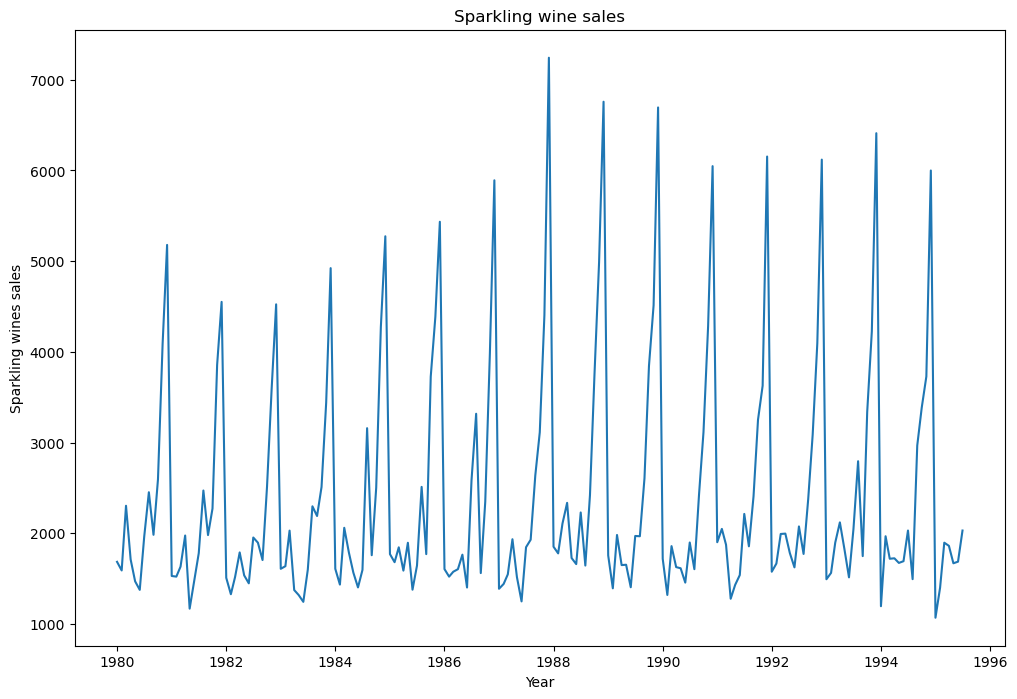

In [232]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.plot(sparkling_data['Sparkling'], data = sparkling_data);
plt.xlabel('Year')
plt.ylabel('Sparkling wines sales')
plt.title('Sparkling wine sales')

In [233]:
#Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

Text(0.5, 1.0, 'Yearly sales of sparkling wine')

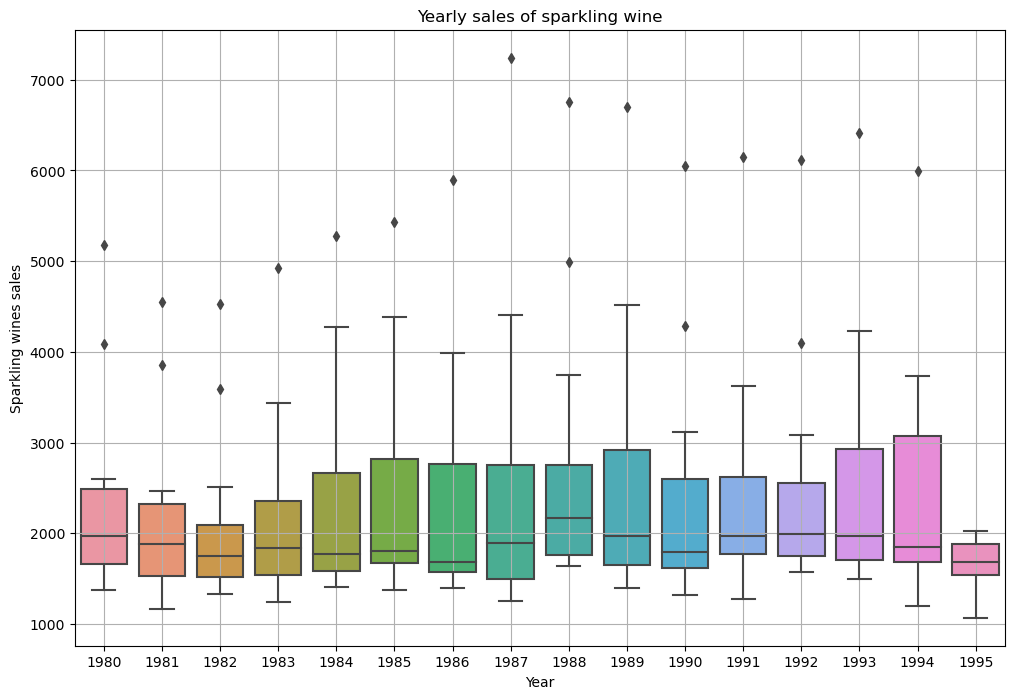

In [234]:
#Yearly sales of sparkling wine data
sns.boxplot(x = sparkling_data.index.year,y = sparkling_data['Sparkling'])
plt.grid();
plt.xlabel('Year')
plt.ylabel('Sparkling wines sales')
plt.title('Yearly sales of sparkling wine')

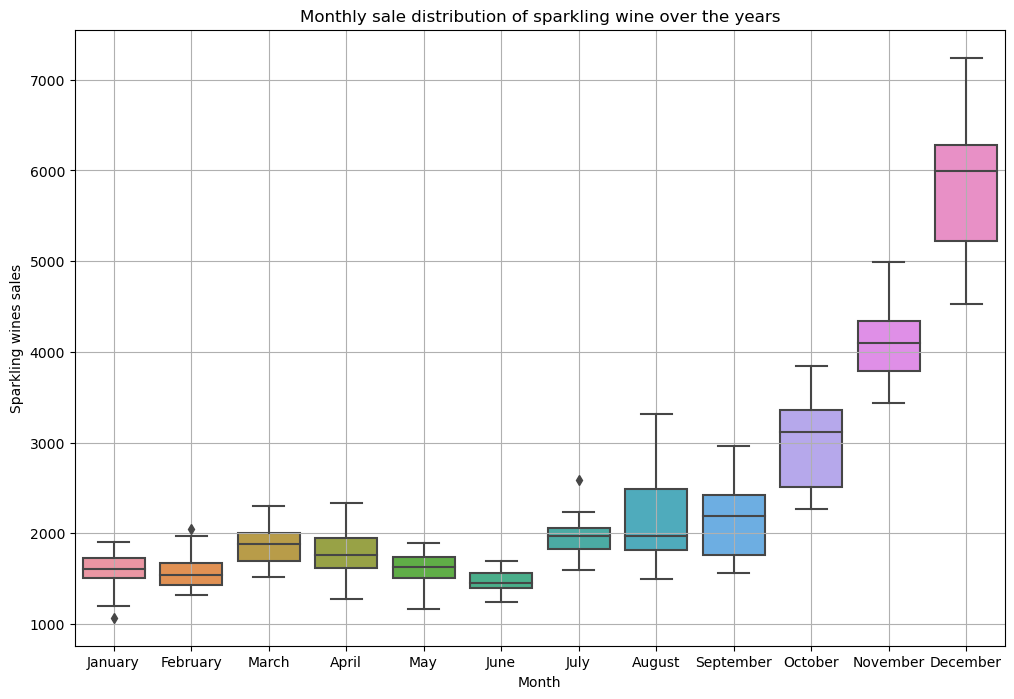

In [235]:
plt.title('Monthly sale distribution of sparkling wine over the years')
sns.boxplot(x = sparkling_data.index.month_name(),y = sparkling_data['Sparkling']);
plt.xlabel('Month')
plt.ylabel('Sparkling wines sales')
plt.grid();
plt.show()

In [236]:
sparkling = sparkling_data['Sparkling']

In [237]:
monthly_sparkling_data = pd.pivot_table(sparkling_data, values = "Sparkling", columns = "Year", index = "Month")
monthly_sparkling_data = monthly_sparkling_data.reindex(labels = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sparkling_data

Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
Jan    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
Feb    1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
Mar    2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
Apr    1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
May    1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
Jun    1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
Jul    1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
Aug    2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
Sep    1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   
Oct    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
Nov    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
Dec    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
Jan    1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Feb    1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Mar    1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
Apr    1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
May    1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Jun    1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Jul    1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Aug    1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Sep    2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
Oct    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Nov    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Dec    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

Text(0.5, 1.0, 'Line plot showing monthly sparkling wine sales over years')

<Figure size 20000x2000 with 0 Axes>

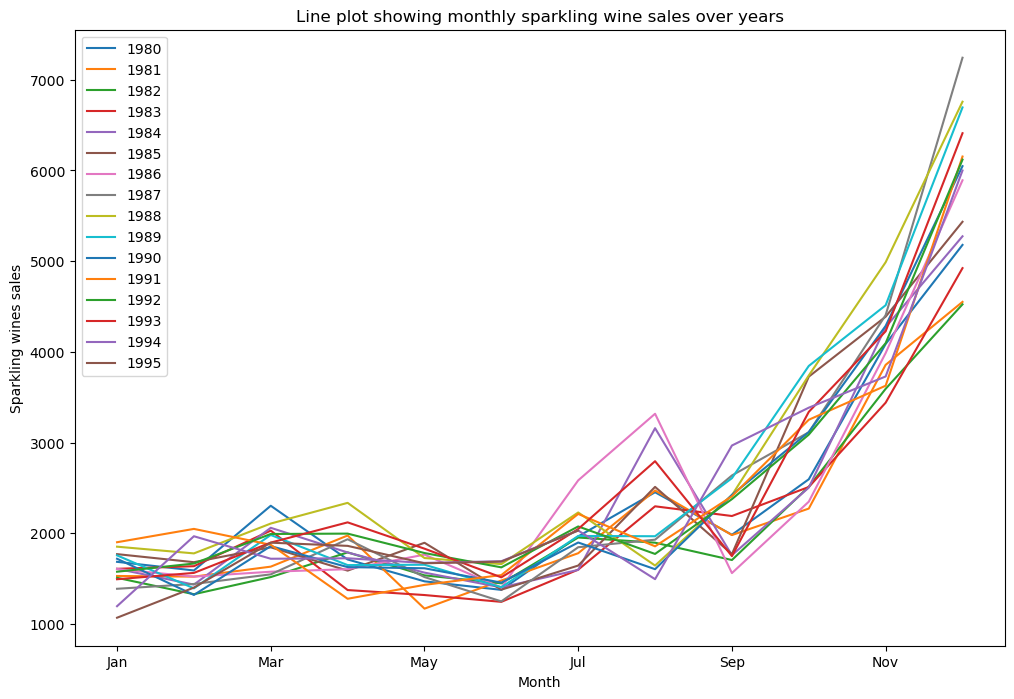

In [238]:
#monthly sparklings over the years
plt.figure(figsize = (200, 20))
monthly_sparkling_data.plot();
plt.ylabel('Sparkling wines sales')
plt.legend(loc = "best")
plt.title('Line plot showing monthly sparkling wine sales over years')

In [239]:
yearly_sparkling_data = monthly_sparkling_data.T

Text(0.5, 1.0, 'Line plot y')

<Figure size 1300x600 with 0 Axes>

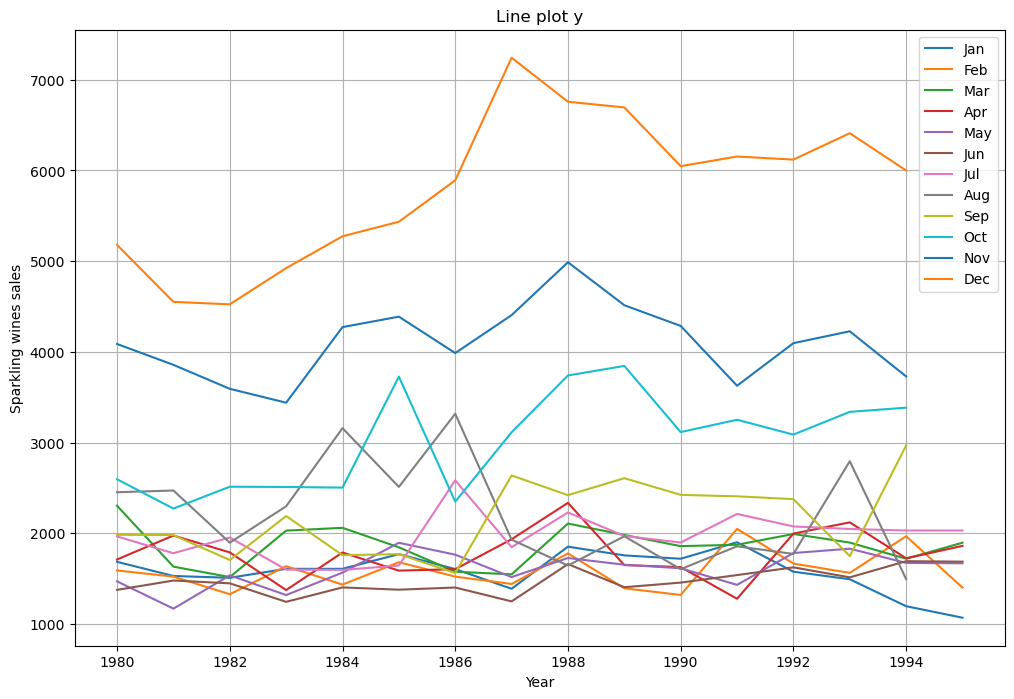

In [240]:
plt.figure(figsize=(13,6))
yearly_sparkling_data.plot();
#plt.plot('yearly_sparkling_data') also plots graph but it is without legend.
plt.ylabel('Sparkling wines sales')
plt.legend(loc='best')
plt.grid()
plt.title('Line plot y')

Text(0.5, 1.0, 'Average qaurterly sparkling wines sales')

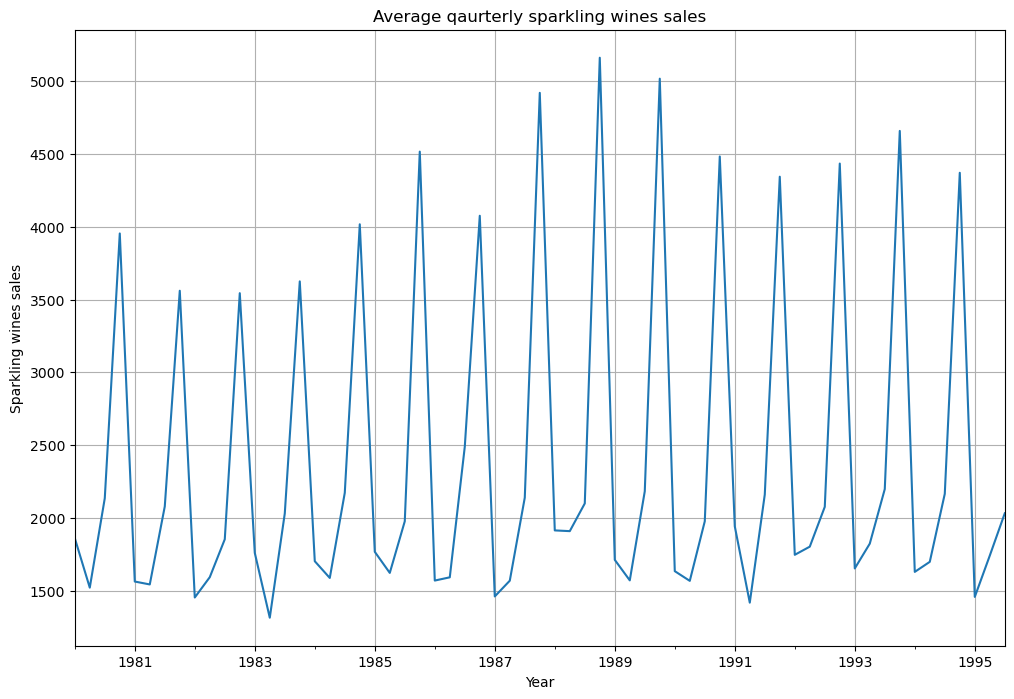

In [241]:
df1_q = sparkling_data['Sparkling'].resample('Q').mean()
df1_q.plot()
plt.xlabel('Year')
plt.ylabel('Sparkling wines sales')
plt.grid()
plt.title('Average qaurterly sparkling wines sales')

In [242]:
#Time series decomposition
additive_decomposition = sm.tsa.seasonal_decompose(sparkling_data['Sparkling'], model = 'additive')

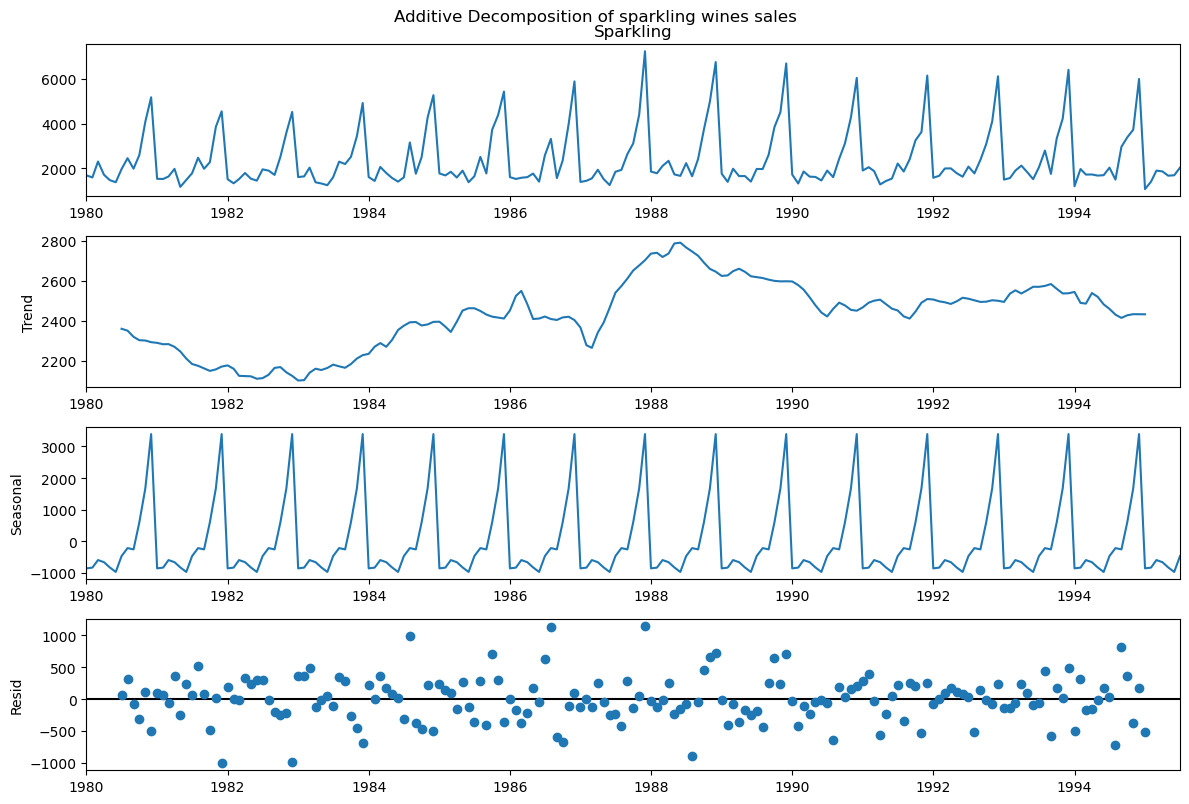

In [243]:
fig = additive_decomposition.plot()
fig.suptitle('Additive Decomposition of sparkling wines sales', x = 0.5,y = 1)
fig.show()

In [244]:
multiplicative_decomposition = sm.tsa.seasonal_decompose(sparkling_data['Sparkling'], model = 'multiplicative')

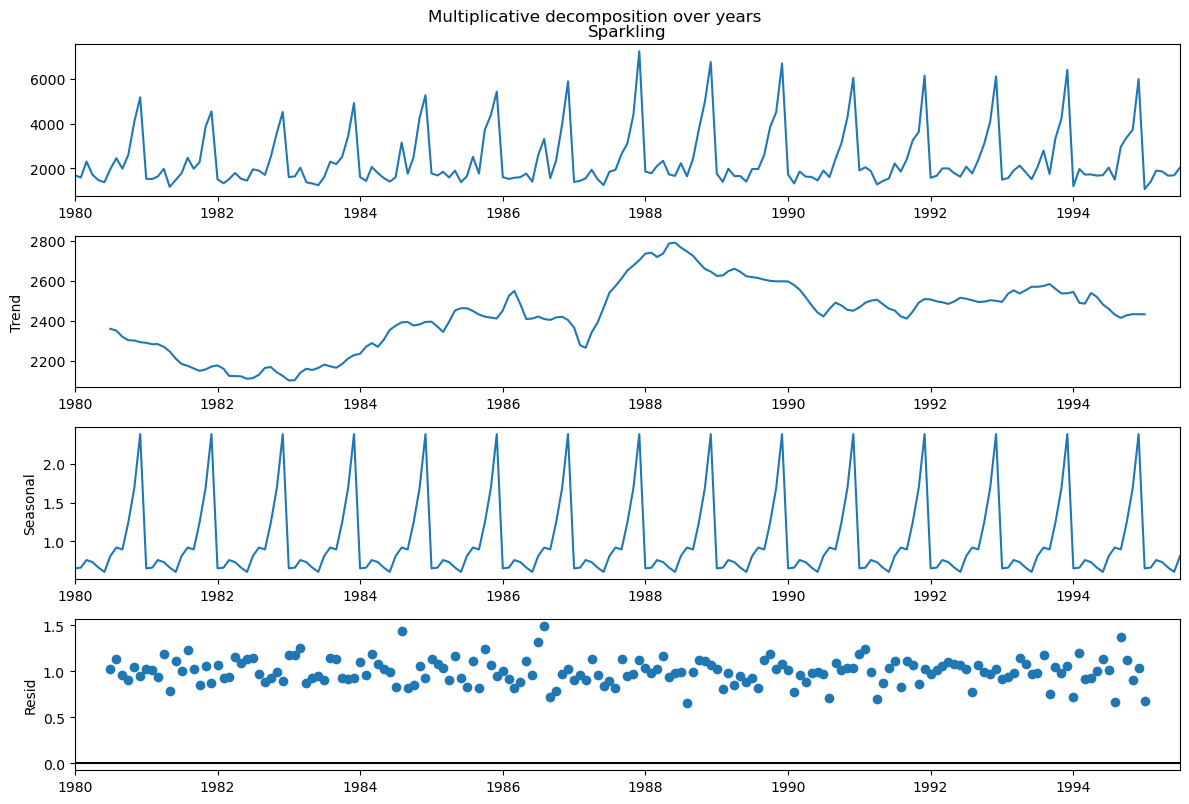

In [245]:
%matplotlib inline
fig = multiplicative_decomposition.plot()
fig.suptitle('Multiplicative decomposition over years', x = 0.5, y = 1)
fig.show()

In [246]:
#3. Split the data into training and test. The test data should start in 1991.

In [247]:
train = pd.DataFrame(sparkling_data[sparkling_data.index < '01-01-1991']['Sparkling'])
test = pd.DataFrame(sparkling_data[sparkling_data.index >= '01-01-1991']['Sparkling'])

In [248]:
train.shape

(132, 1)

In [249]:
test.shape

(55, 1)

In [250]:
print(train.head())
print(train.tail())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
            Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047


In [251]:
print(test.head())
print(test.tail())

            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432
            Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


In [252]:
#!pip3 install statsmodels

#4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 

Other models such as regression,naïve forecast models and simple average models. 

should also be built on the training data and check the performance on the test data using RMSE.

In [253]:
## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

#We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02

In [254]:
#Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
LinearRegression_test

Sparkling  time    RegOnTime
YearMonth                               
1991-01-01       1902   133  2791.652093
1991-02-01       2049   134  2797.484752
1991-03-01       1874   135  2803.317410
1991-04-01       1279   136  2809.150069
1991-05-01       1432   137  2814.982727
1991-06-01       1540   138  2820.815386
1991-07-01       2214   139  2826.648044
1991-08-01       1857   140  2832.480703
1991-09-01       2408   141  2838.313361
1991-10-01       3252   142  2844.146020
1991-11-01       3627   143  2849.978678
1991-12-01       6153   144  2855.811337
1992-01-01       1577   145  2861.643995
1992-02-01       1667   146  2867.476654
1992-03-01       1993   147  2873.309312
1992-04-01       1997   148  2879.141971
1992-05-01       1783   149  2884.974629
1992-06-01       1625   150  2890.807288
1992-07-01       2076   151  2896.639947
1992-08-01       1773   152  2902.472605
1992-09-01       2377   153  2908.305264
1992-10-01       3088   154  2914.137922
1992-11-01       4096   155  2919.970581
1992-12-01       6119   156  2925.803239
1993-01-01       1494   157  2931.635898
1993-02-01       1564   158  2937.468556
1993-03-01       1898   159  2943.301215
1993-04-01       2121   160  2949.133873
1993-05-01       1831   161  2954.966532
1993-06-01       1515   162  2960.799190
1993-07-01       2048   163  2966.631849
1993-08-01       2795   164  2972.464507
1993-09-01       1749   165  2978.297166
1993-10-01       3339   166  2984.129824
1993-11-01       4227   167  2989.962483
1993-12-01       6410   168  2995.795141
1994-01-01       1197   169  3001.627800
1994-02-01       1968   170  3007.460458
1994-03-01       1720   171  3013.293117
1994-04-01       1725   172  3019.125775
1994-05-01       1674   173  3024.958434
1994-06-01       1693   174  3030.791092
1994-07-01       2031   175  3036.623751
1994-08-01       1495   176  3042.456409
1994-09-01       2968   177  3048.289068
1994-10-01       3385   178  3054.121726
1994-11-01       3729   179  3059.954385
1994-12-01       5999   180  3065.787043
1995-01-01       1070   181  3071.619702
1995-02-01       1402   182  3077.452360
1995-03-01       1897   183  3083.285019
1995-04-01       1862   184  3089.117677
1995-05-01       1670   185  3094.950336
1995-06-01       1688   186  3100.782994
1995-07-01       2031   187  3106.615653

In [255]:
lr.intercept_

2015.9085126069858

In [256]:
lr.coef_

array([5.8326585])

Text(0.5, 1.0, 'Time series data with forecasts')

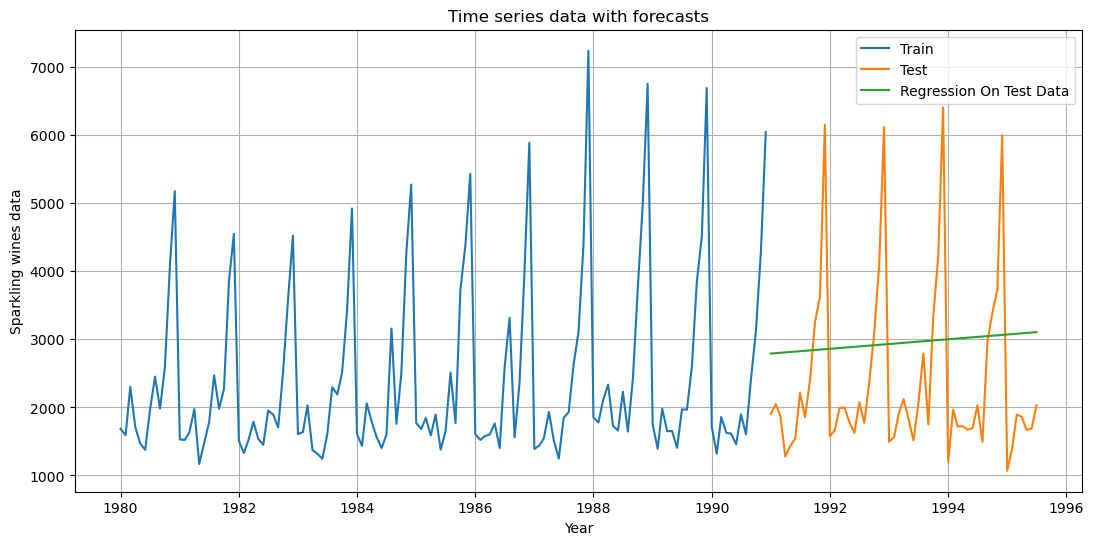

In [257]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')
plt.legend(loc='best')
plt.grid();
plt.xlabel('Year')
plt.ylabel('Sparkling wines data')
plt.title('Time series data with forecasts')

In [258]:
#### Defining the accuracy metrics.

from sklearn import metrics

### Model Evaluation

## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.14


Test RMSE
RegressionOnTime  1389.135175

In [259]:
## Method 2: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

MovingAverage = pd.DataFrame(sparkling_data['Sparkling']).copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [260]:
#### Trailing moving averages


MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

In [261]:
MovingAverage.tail()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1995-03-01       1897      1649.5     2592.00  2913.666667  2664.000000
1995-04-01       1862      1879.5     1557.75  2659.833333  2645.222222
1995-05-01       1670      1766.0     1707.75  2316.666667  2664.666667
1995-06-01       1688      1679.0     1779.25  1598.166667  2522.444444
1995-07-01       2031      1859.5     1812.75  1758.333333  2372.000000

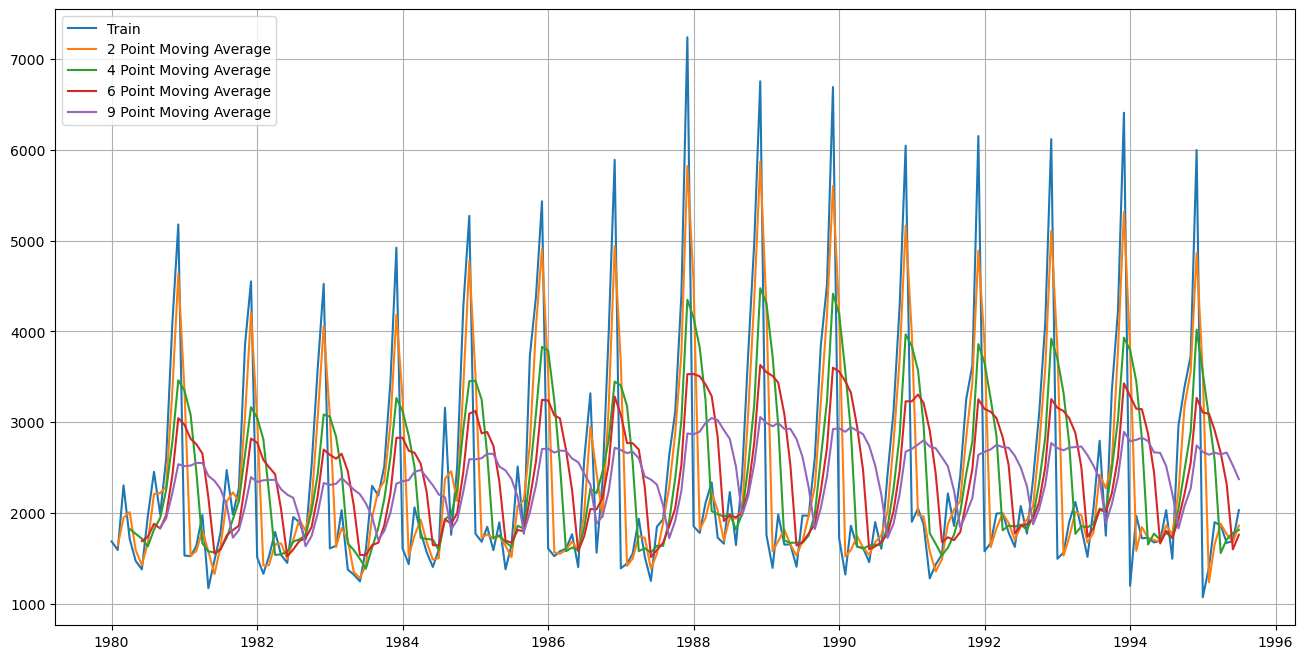

In [262]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [263]:
#Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

#Creating train and test set 
trailing_MovingAverage_train = pd.DataFrame(MovingAverage[MovingAverage.index < '01-01-1991'])
trailing_MovingAverage_test = pd.DataFrame(MovingAverage[MovingAverage.index >= '01-01-1991'])

print(trailing_MovingAverage_train)
print(trailing_MovingAverage_test)

            Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
...               ...         ...         ...          ...          ...
1990-08-01       1605      1752.0     1644.00  1677.166667  2199.777778
1990-09-01       2424      2014.5     1846.25  1771.333333  1725.333333
1990-10-01       3116      2770.0     2261.00  2019.333333  1880.444444
1990-11-01       4286      3701.0     2857.75  2464.500000  2209.888889
1990-12-01       6047      5166.5     3968.25  3229.500000  2675.222222

[132 rows x 5 columns]
            Sparkling  Trailing_2  Trail

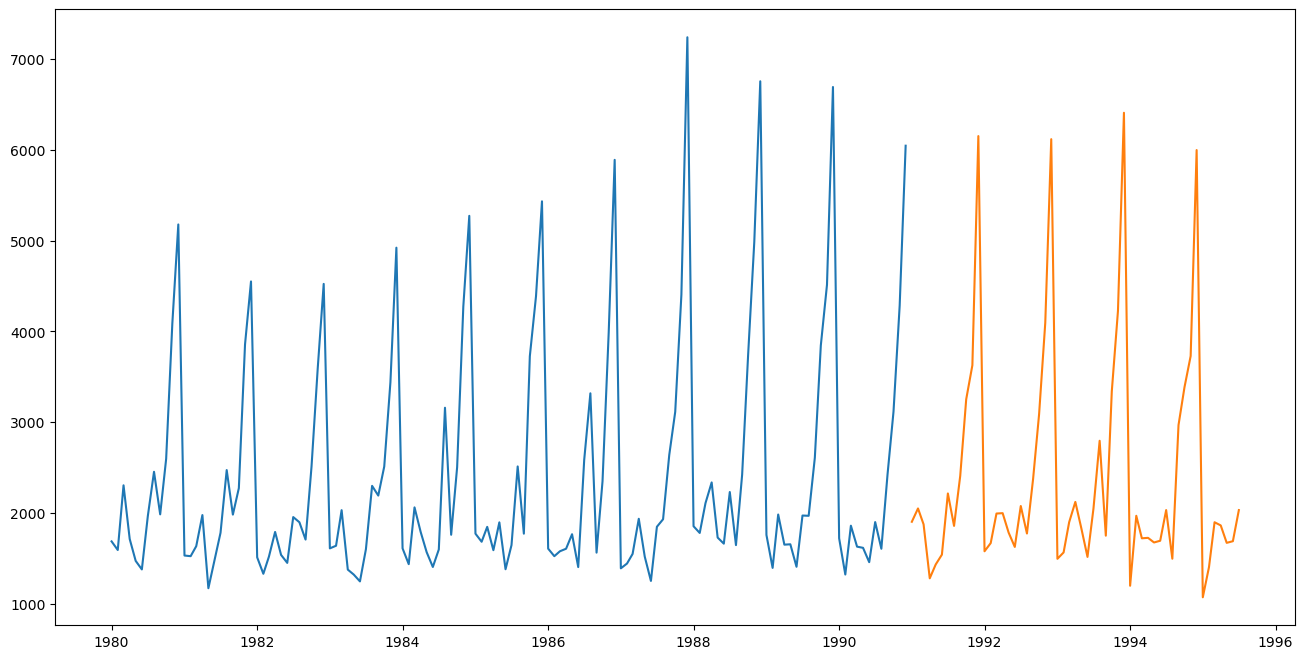

In [264]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

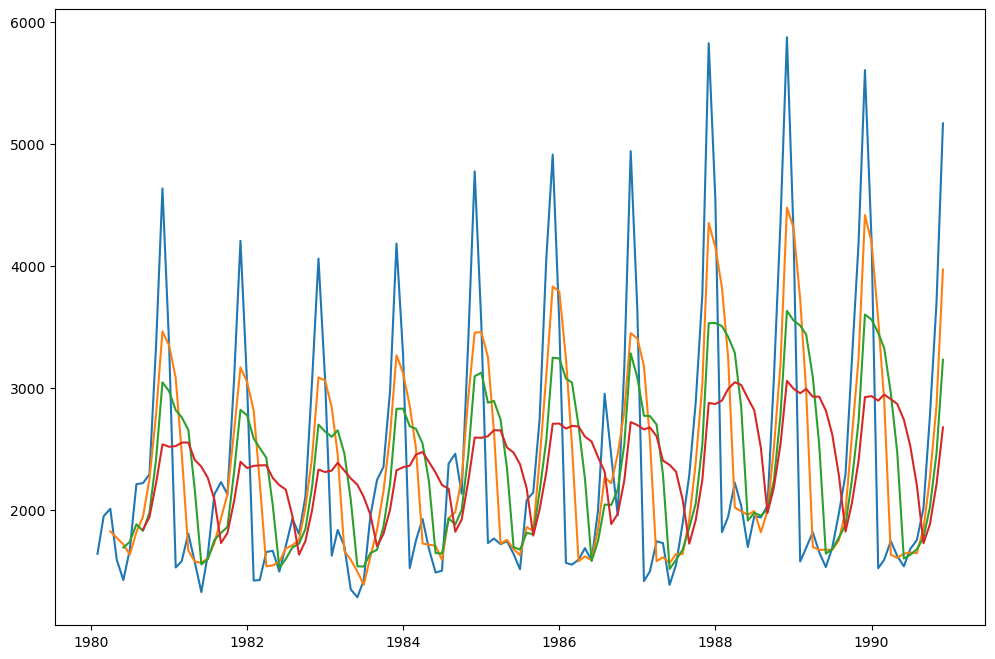

In [265]:
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

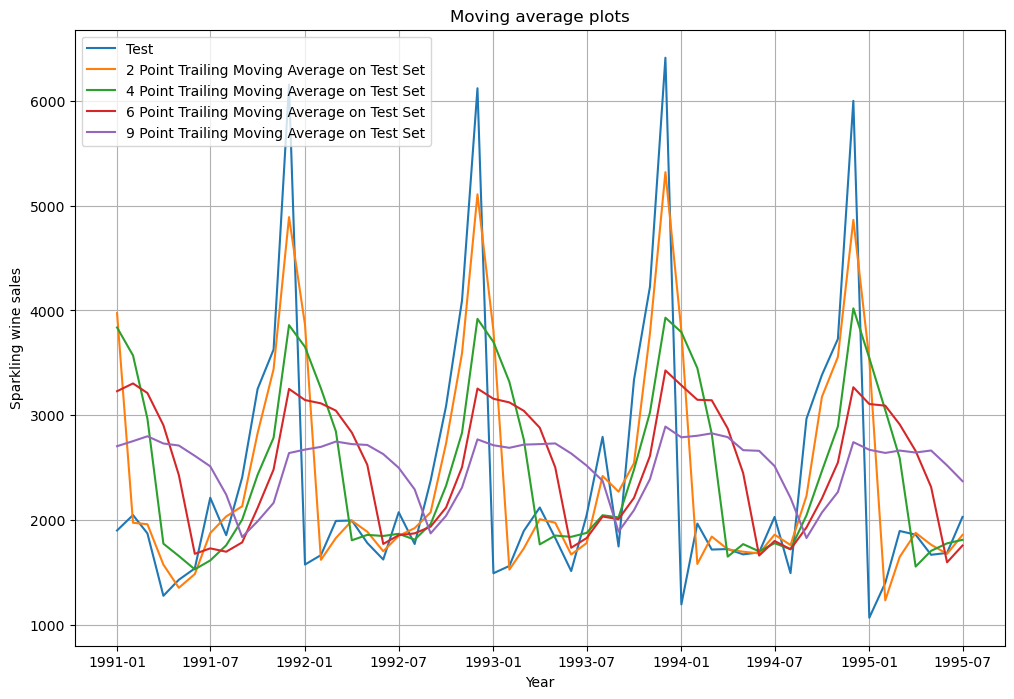

In [266]:
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.title('Moving average plots')
plt.grid();

In [267]:
### Model Evaluation

##### Done only on the test data.

#### RMSE Calculation as below 

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


Test RMSE
RegressionOnTime             1389.135175
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

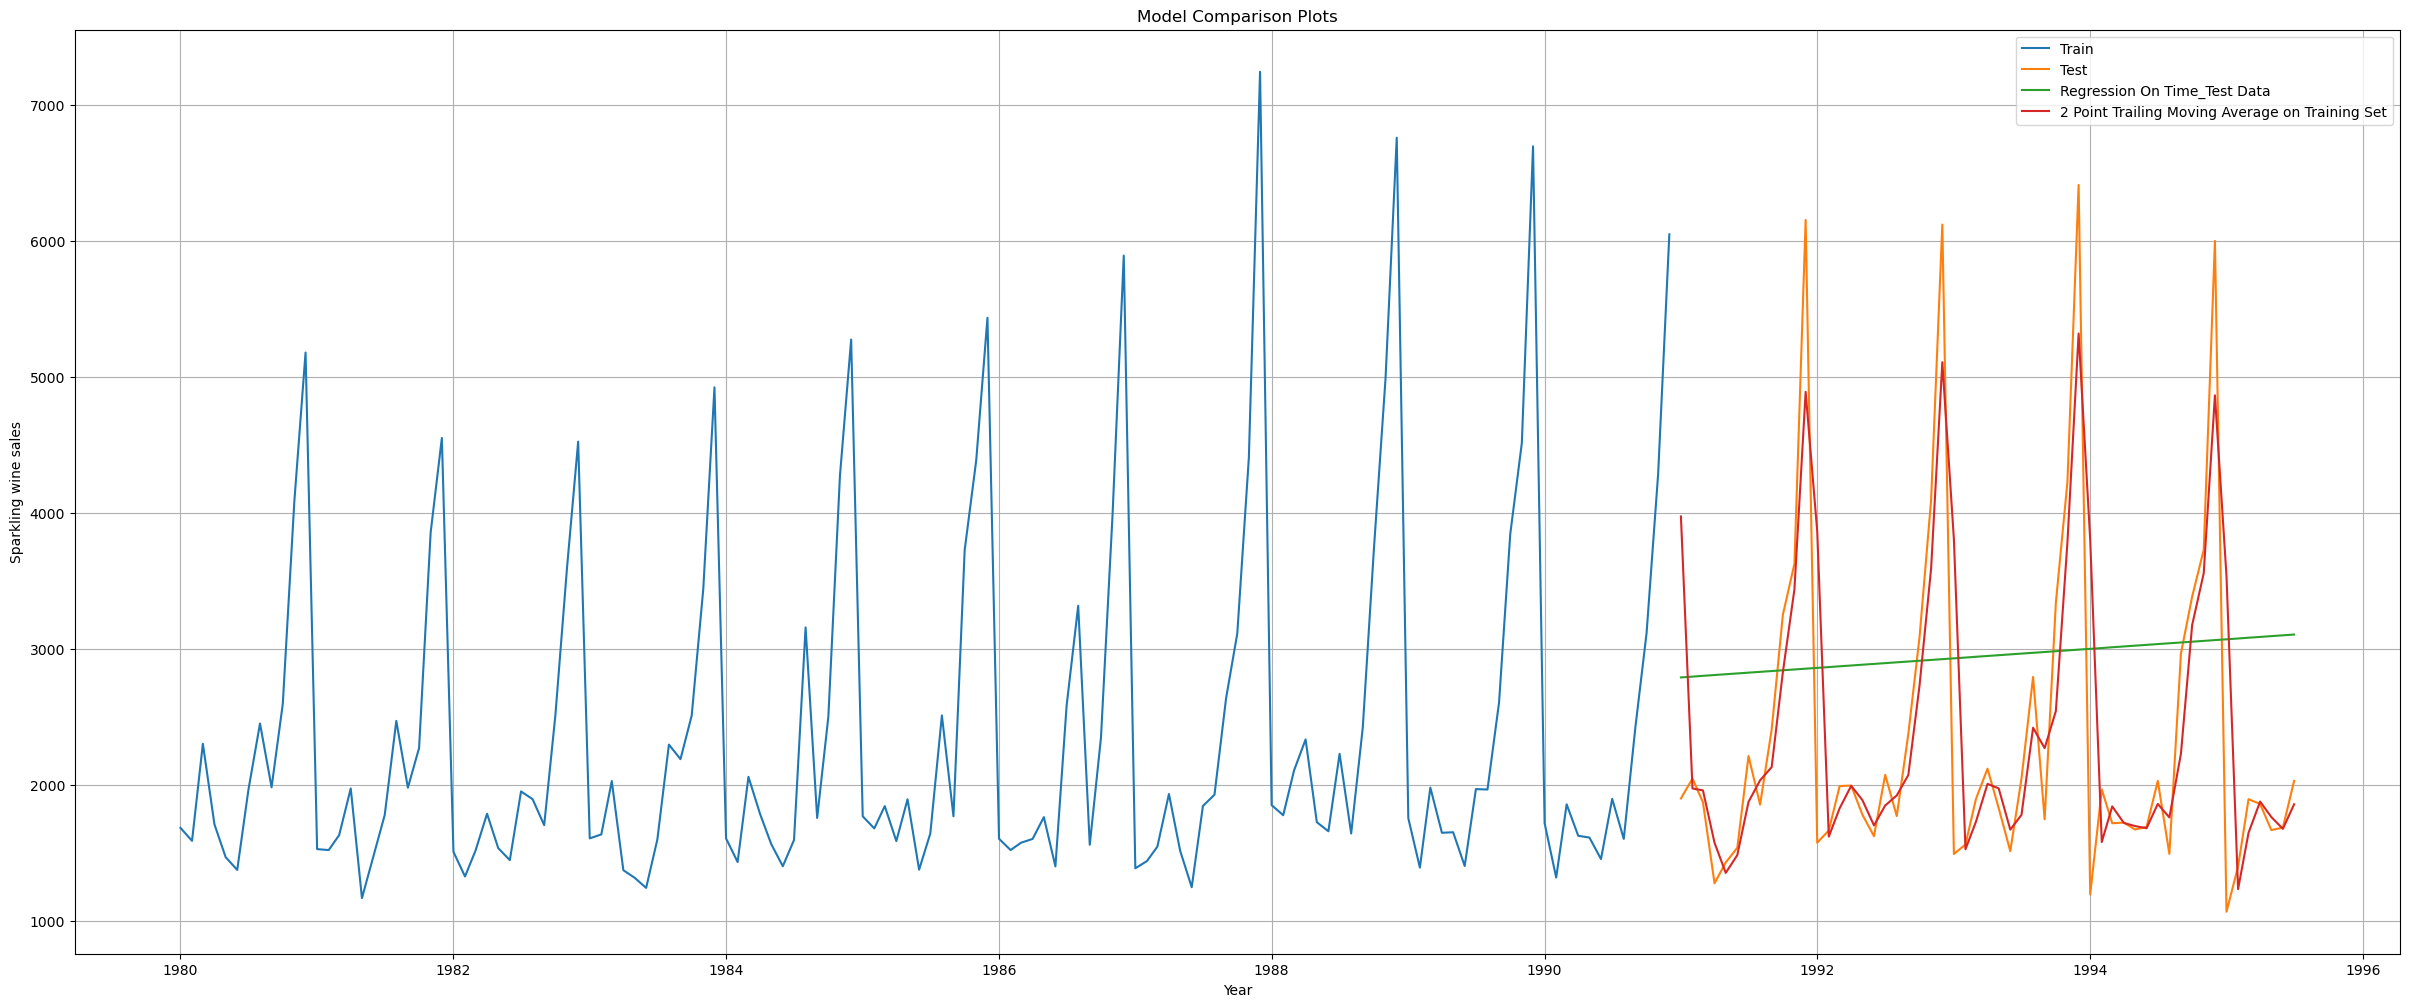

In [268]:
## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.title('Moving average plots')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [269]:
## Method 3: Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

model_SES_autofit = model_SES.fit(optimized=True)

model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [270]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.932624
1991-02-01       2049  2724.932624
1991-03-01       1874  2724.932624
1991-04-01       1279  2724.932624
1991-05-01       1432  2724.932624

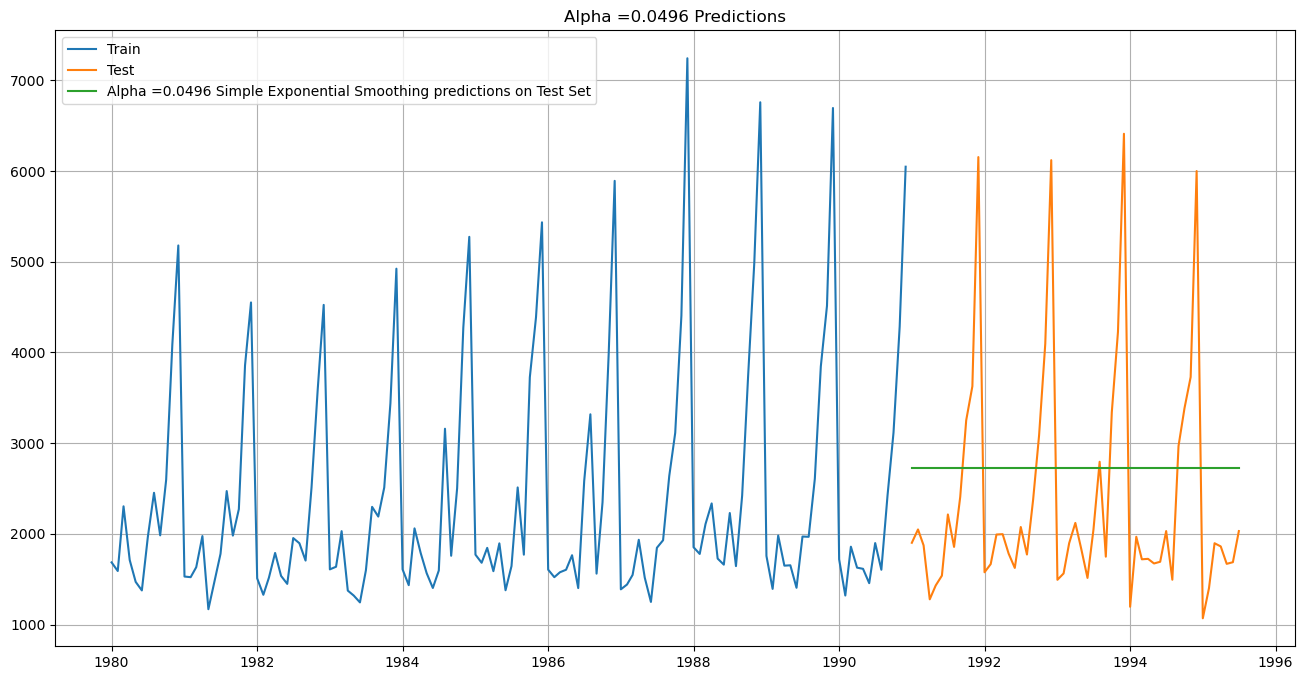

In [271]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

In [272]:
### Model Evaluation for $\alpha$ = 0.0496 : Simple Exponential Smoothing

## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


Test RMSE
RegressionOnTime                         1389.135175
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0496,SimpleExponentialSmoothing  1316.035487

In [273]:
#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

for i in np.arange(0.1,1,0.1):
    i = round(i,1)
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)

    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)


In [274]:
SES_test

Sparkling      predict  (predict, 0.1)  (predict, 0.2)  \
YearMonth                                                            
1991-01-01       1902  2724.932624     2914.795408     3357.723951   
1991-02-01       2049  2724.932624     2914.795408     3357.723951   
1991-03-01       1874  2724.932624     2914.795408     3357.723951   
1991-04-01       1279  2724.932624     2914.795408     3357.723951   
1991-05-01       1432  2724.932624     2914.795408     3357.723951   
1991-06-01       1540  2724.932624     2914.795408     3357.723951   
1991-07-01       2214  2724.932624     2914.795408     3357.723951   
1991-08-01       1857  2724.932624     2914.795408     3357.723951   
1991-09-01       2408  2724.932624     2914.795408     3357.723951   
1991-10-01       3252  2724.932624     2914.795408     3357.723951   
1991-11-01       3627  2724.932624     2914.795408     3357.723951   
1991-12-01       6153  2724.932624     2914.795408     3357.723951   
1992-01-01       1577  2724.932624     2914.795408     3357.723951   
1992-02-01       1667  2724.932624     2914.795408     3357.723951   
1992-03-01       1993  2724.932624     2914.795408     3357.723951   
1992-04-01       1997  2724.932624     2914.795408     3357.723951   
1992-05-01       1783  2724.932624     2914.795408     3357.723951   
1992-06-01       1625  2724.932624     2914.795408     3357.723951   
1992-07-01       2076  2724.932624     2914.795408     3357.723951   
1992-08-01       1773  2724.932624     2914.795408     3357.723951   
1992-09-01       2377  2724.932624     2914.795408     3357.723951   
1992-10-01       3088  2724.932624     2914.795408     3357.723951   
1992-11-01       4096  2724.932624     2914.795408     3357.723951   
1992-12-01       6119  2724.932624     2914.795408     3357.723951   
1993-01-01       1494  2724.932624     2914.795408     3357.723951   
1993-02-01       1564  2724.932624     2914.795408     3357.723951   
1993-03-01       1898  2724.932624     2914.795408     3357.723951   
1993-04-01       2121  2724.932624     2914.795408     3357.723951   
1993-05-01       1831  2724.932624     2914.795408     3357.723951   
1993-06-01       1515  2724.932624     2914.795408     3357.723951   
1993-07-01       2048  2724.932624     2914.795408     3357.723951   
1993-08-01       2795  2724.932624     2914.795408     3357.723951   
1993-09-01       1749  2724.932624     2914.795408     3357.723951   
1993-10-01       3339  2724.932624     2914.795408     3357.723951   
1993-11-01       4227  2724.932624     2914.795408     3357.723951   
1993-12-01       6410  2724.932624     2914.795408     3357.723951   
1994-01-01       1197  2724.932624     2914.795408     3357.723951   
1994-02-01       1968  2724.932624     2914.795408     3357.723951   
1994-03-01       1720  2724.932624     2914.795408     3357.723951   
1994-04-01       1725  2724.932624     2914.795408     3357.723951   
1994-05-01       1674  2724.932624     2914.795408     3357.723951   
1994-06-01       1693  2724.932624     2914.795408     3357.723951   
1994-07-01       2031  2724.932624     2914.795408     3357.723951   
1994-08-01       1495  2724.932624     2914.795408     3357.723951   
1994-09-01       2968  2724.932624     2914.795408     3357.723951   
1994-10-01       3385  2724.932624     2914.795408     3357.723951   
1994-11-01       3729  2724.932624     2914.795408     3357.723951   
1994-12-01       5999  2724.932624     2914.795408     3357.723951   
1995-01-01       1070  2724.932624     2914.795408     3357.723951   
1995-02-01       1402  2724.932624     2914.795408     3357.723951   
1995-03-01       1897  2724.932624     2914.795408     3357.723951   
1995-04-01       1862  2724.932624     2914.795408     3357.723951   
1995-05-01       1670  2724.932624     2914.795408     3357.723951   
1995-06-01       1688  2724.932624     2914.795408     3357.723951   
1995-07-01       2031  2724.932624     2914.795408     3357.723951   

            (predict,

In [275]:
## Model Evaluation

resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

Test RMSE
RegressionOnTime                         1389.135175
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0496,SimpleExponentialSmoothing  1316.035487
Alpha=0.1,SimpleExponentialSmoothing     1375.393398

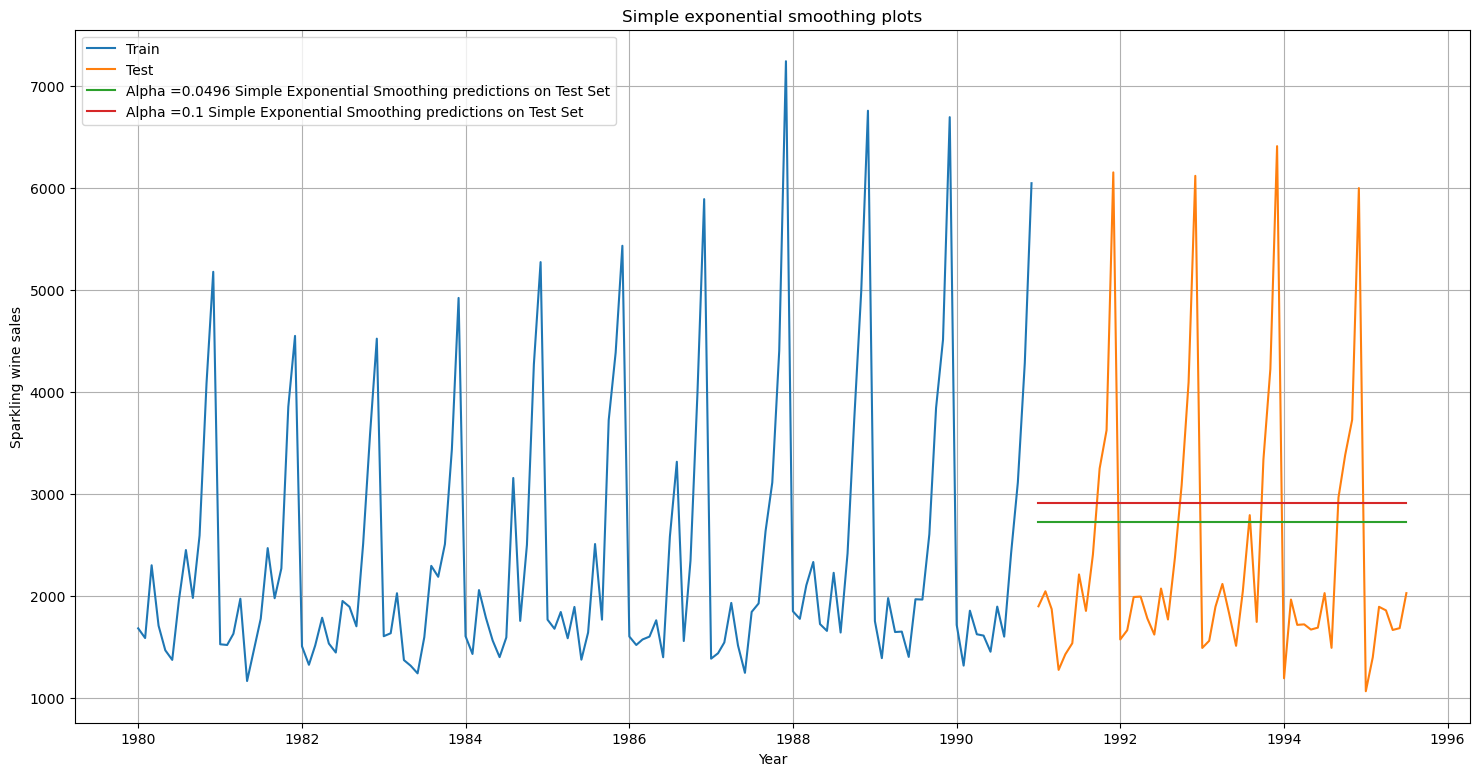

In [276]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.title('Simple exponential smoothing plots')



plt.legend(loc='best')
plt.grid();

resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf


In [277]:
## Method 4: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

DES_train = train.copy()
DES_test = test.copy()

model_DES_optimal = Holt(DES_train['Sparkling']).fit(optimized=True)

model_DES_optimal.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

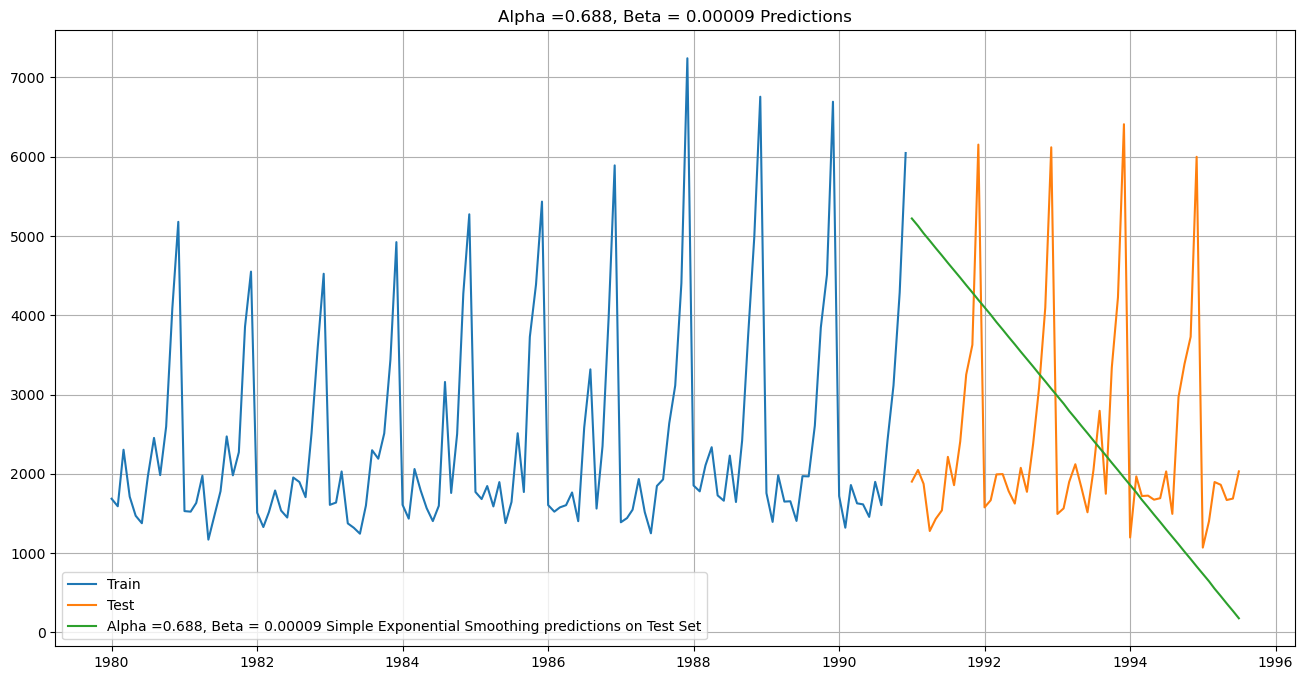

In [278]:
DES_test['predict'] = model_DES_optimal.forecast(steps=len(test))
DES_test.head()

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.688, Beta = 0.00009 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.688, Beta = 0.00009 Predictions');

In [279]:
## Test Data

rmse_des_optimal_model_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.688, Beta = 0.00009 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_des_optimal_model_test_1]},index=['Alpha =0.688, Beta = 0.00009,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

For Alpha =0.688, Beta = 0.00009 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


Test RMSE
RegressionOnTime                                    1389.135175
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487

In [280]:
#Brute force looping approach for double exponential smoothing to find best parameters than optimized parameters

model_DES = Holt(DES_train['Sparkling'])

## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [281]:
#Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

resultsDf_7.sort_values(by=['Test RMSE']).head()
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

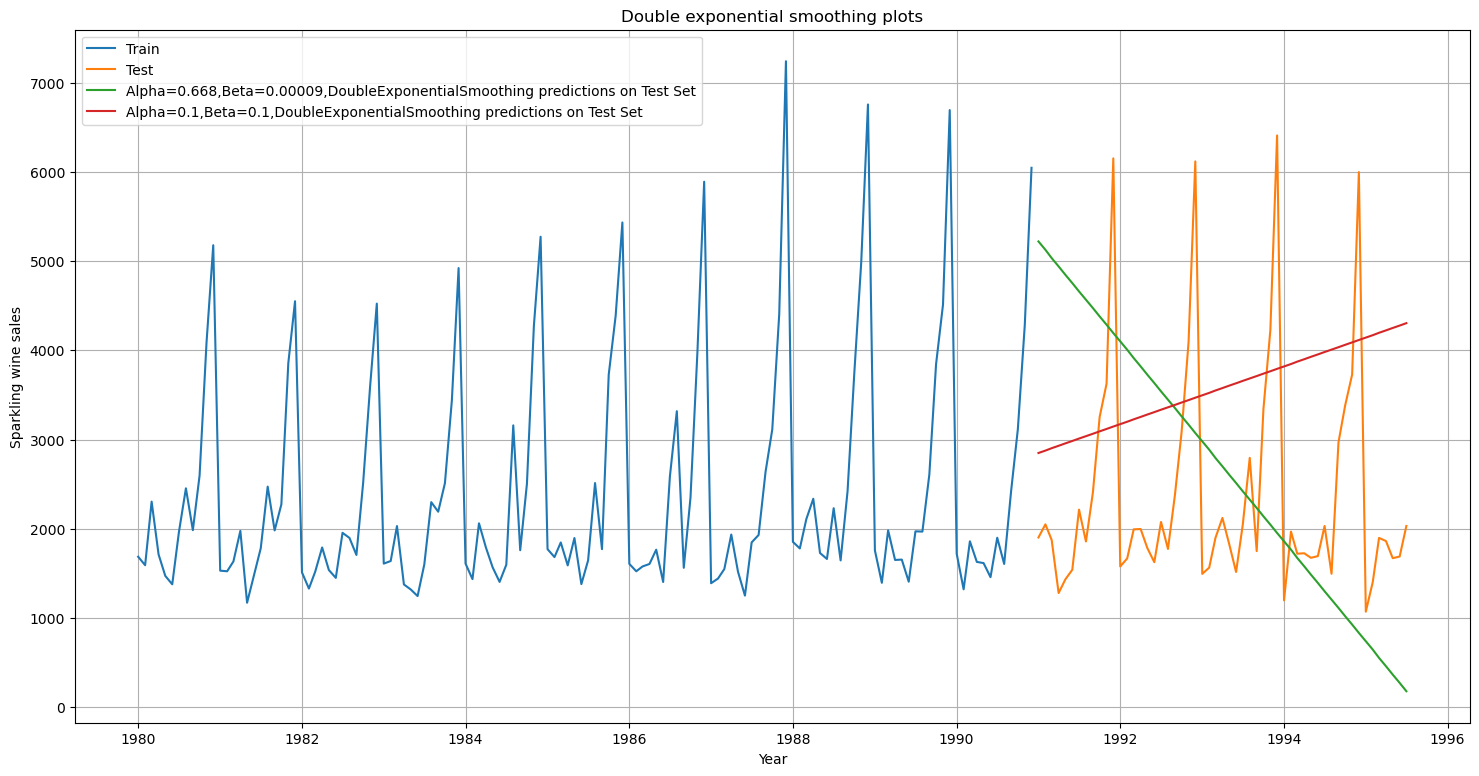

In [282]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.668,Beta=0.00009,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.title('Double exponential smoothing plots')
plt.legend(loc='best')
plt.grid();

In [283]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

In [284]:
## Method 5: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')

model_TES_autofit = model_TES.fit(optimized = True)

#The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [285]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1587.497468
1991-02-01       2049   1356.394925
1991-03-01       1874   1762.929755
1991-04-01       1279   1656.165933
1991-05-01       1432   1542.002730

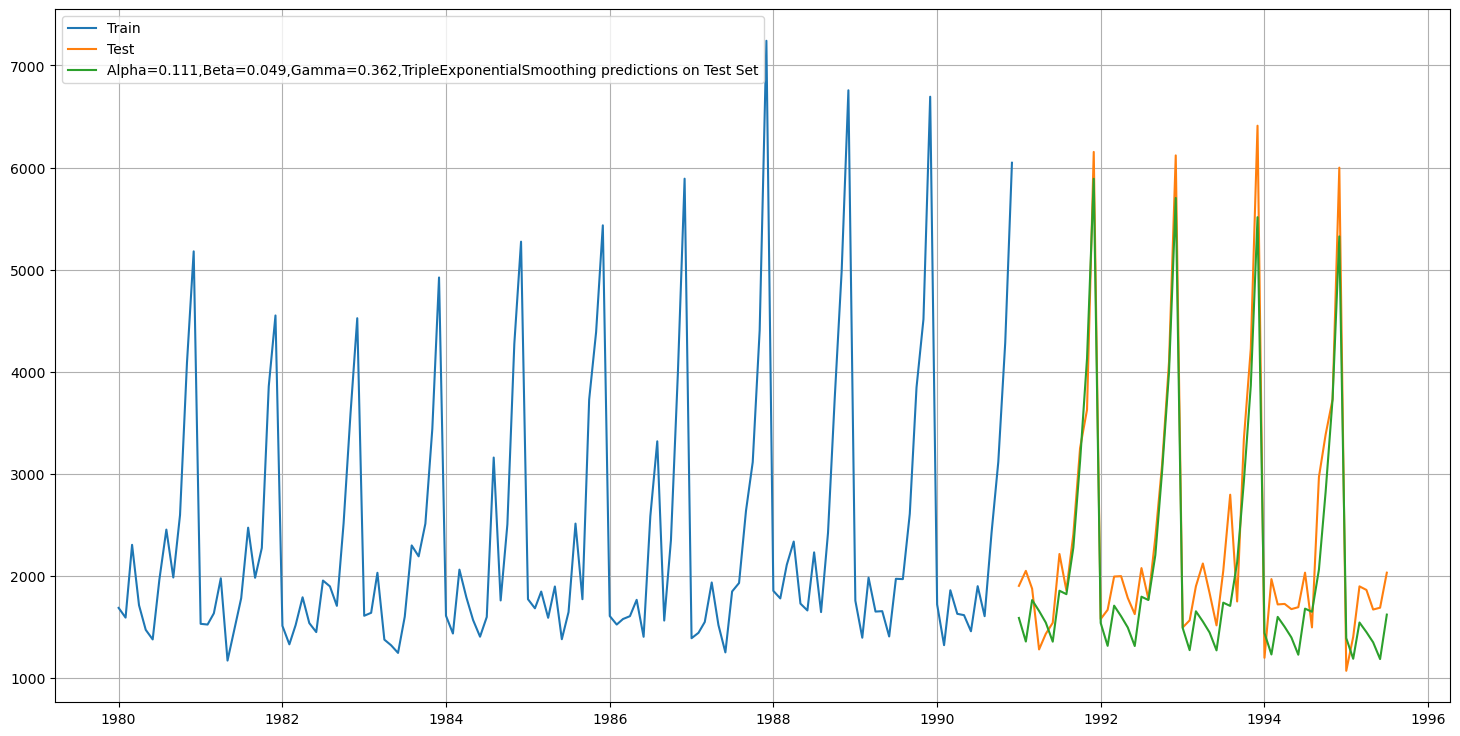

In [286]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();


In [287]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 404.287


Test RMSE
RegressionOnTime                                    1389.135175
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   404.286809

In [288]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1  3.814397e+02  5.910387e+02
1             0.1          0.1           0.2  3.677929e+02  6.214407e+02
2             0.1          0.1           0.3  3.614334e+02  6.395595e+02
3             0.1          0.1           0.4  3.607002e+02  6.447910e+02
4             0.1          0.1           0.5  3.644451e+02  6.410980e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.882994e+05  4.386054e+06
996           1.0          1.0           0.7  2.660015e+05  8.649577e+06
997           1.0          1.0           0.8  1.101923e+06  2.700435e+05
998           1.0          1.0           0.9  7.695708e+04  2.472201e+05
999           1.0          1.0           1.0  2.456050e+04  1.256914e+05

[1000 rows x 5 columns]

In [289]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
301           0.4          0.1           0.2  384.467709  317.434302
211           0.3          0.2           0.2  388.544148  329.037543
200           0.3          0.1           0.1  388.220071  337.080969
110           0.2          0.2           0.1  398.482510  340.186457
402           0.5          0.1           0.3  396.598057  345.913415

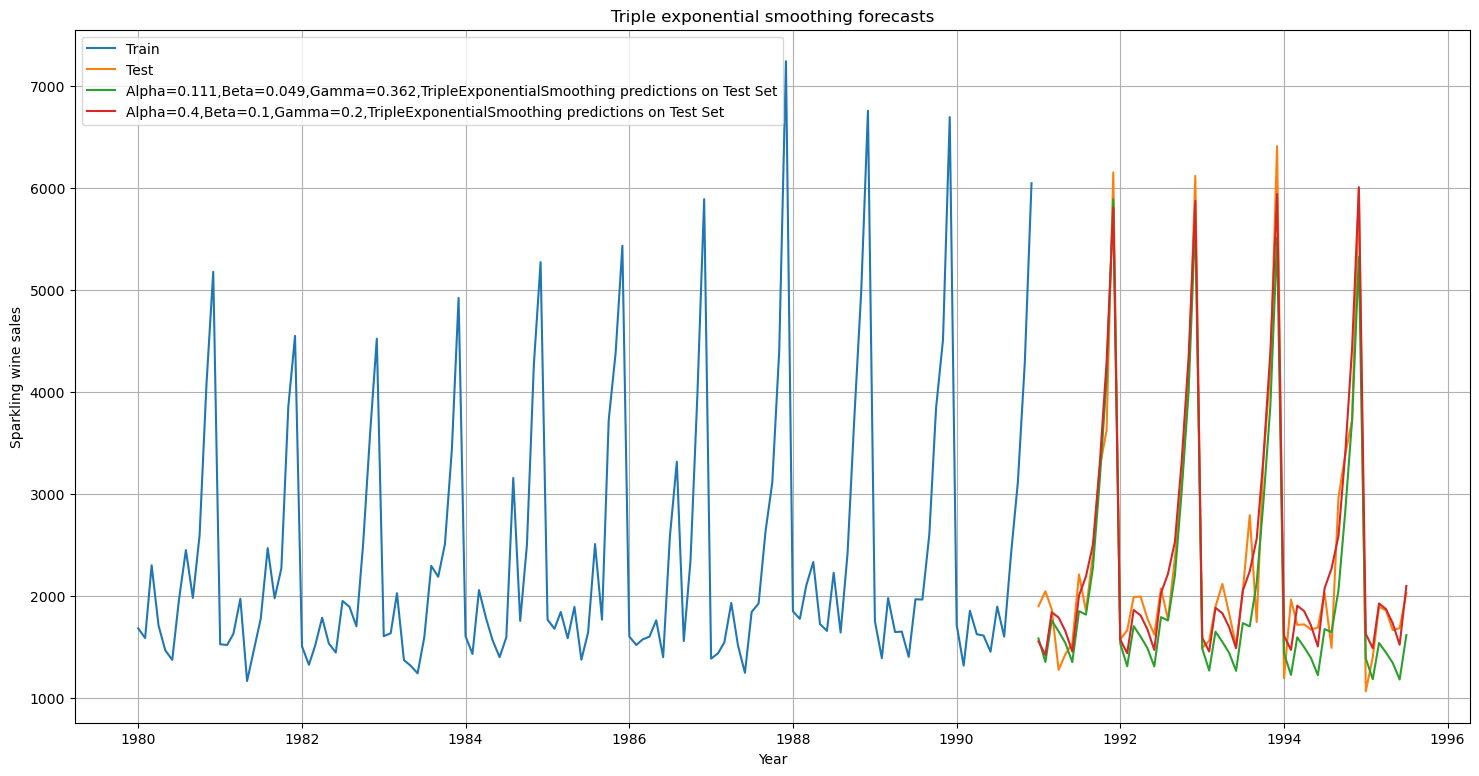

In [290]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.title('Triple exponential smoothing forecasts')
plt.legend(loc='best')
plt.grid();

In [291]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   404.286809
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

#For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 1.0, $\beta$ = 0.7 and $\gamma$ = 0.3.

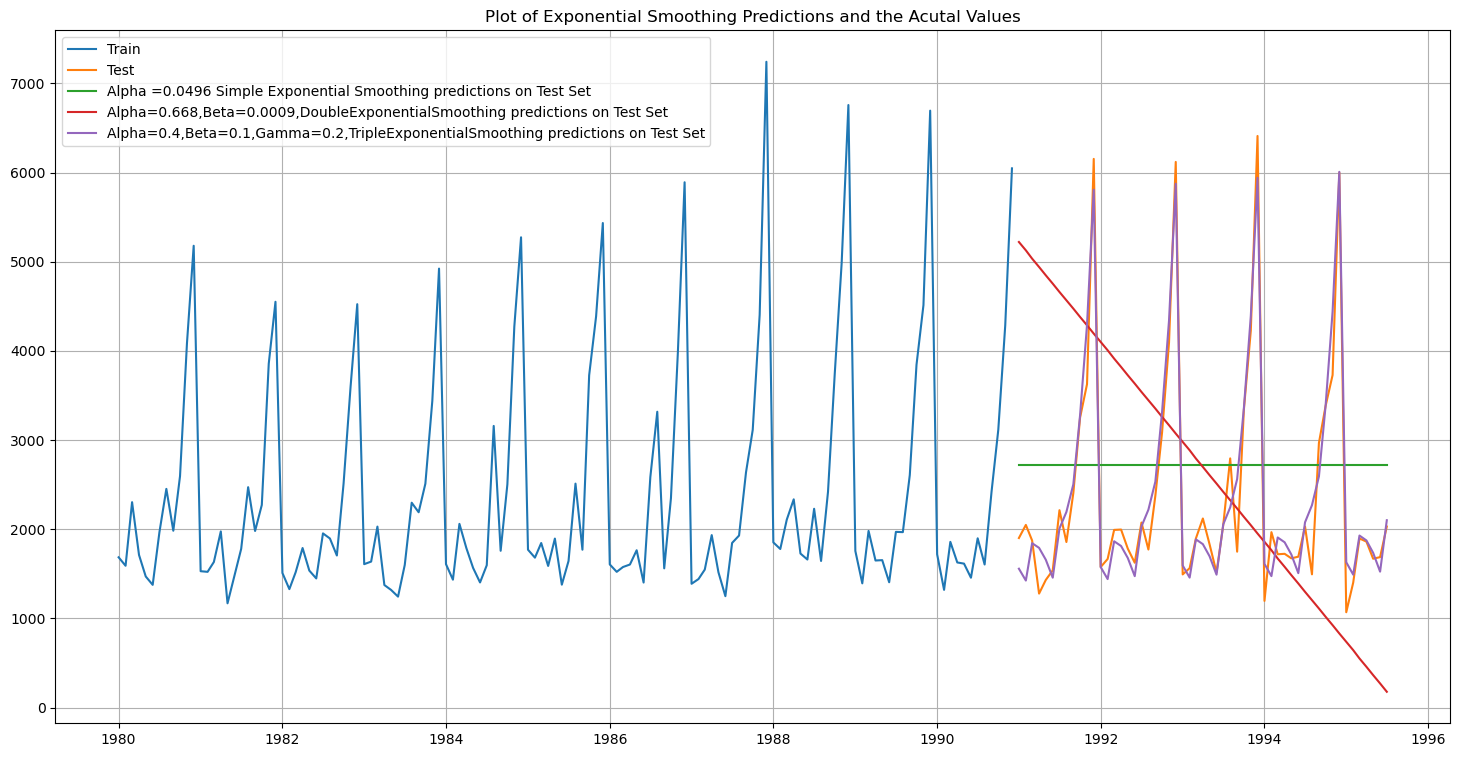

In [292]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=0.668,Beta=0.0009,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');


RMSE: 374.6198607602226


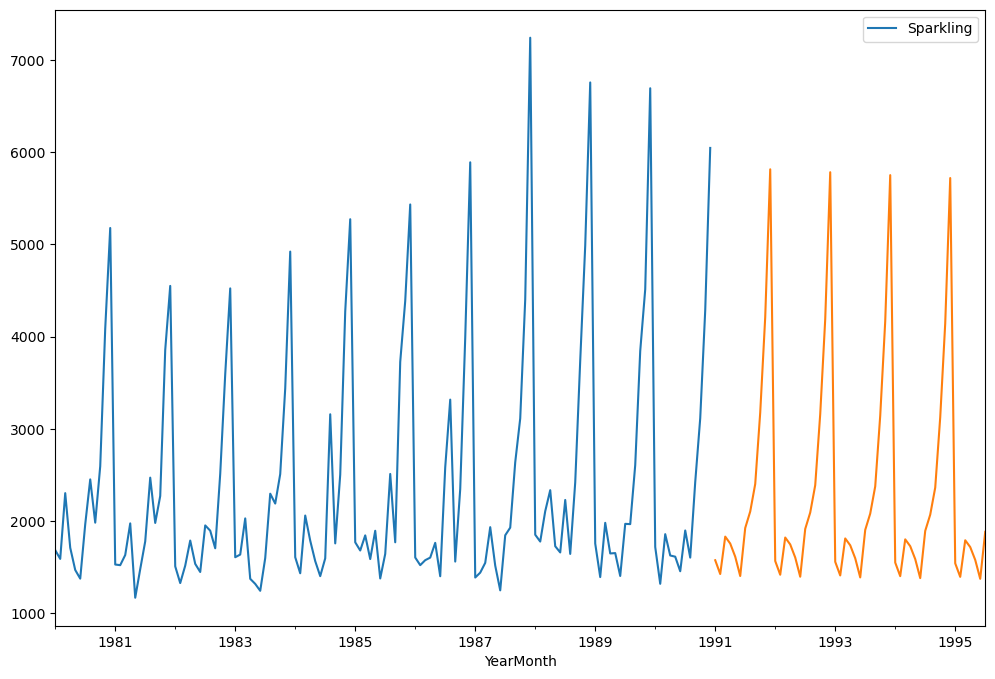

In [293]:
#The best model to be built on the whole data is the following:

#* Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing

df = pd.DataFrame(train['Sparkling'])
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

train.plot()
prediction_1.plot();

In [294]:
#One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1991-01-01   839.462322  1576.513476  2313.564631
1991-02-01   689.897061  1426.948216  2163.999371
1991-03-01  1095.495232  1832.546386  2569.597541
1991-04-01  1020.346974  1757.398129  2494.449283
1991-05-01   877.940031  1614.991185  2352.042340

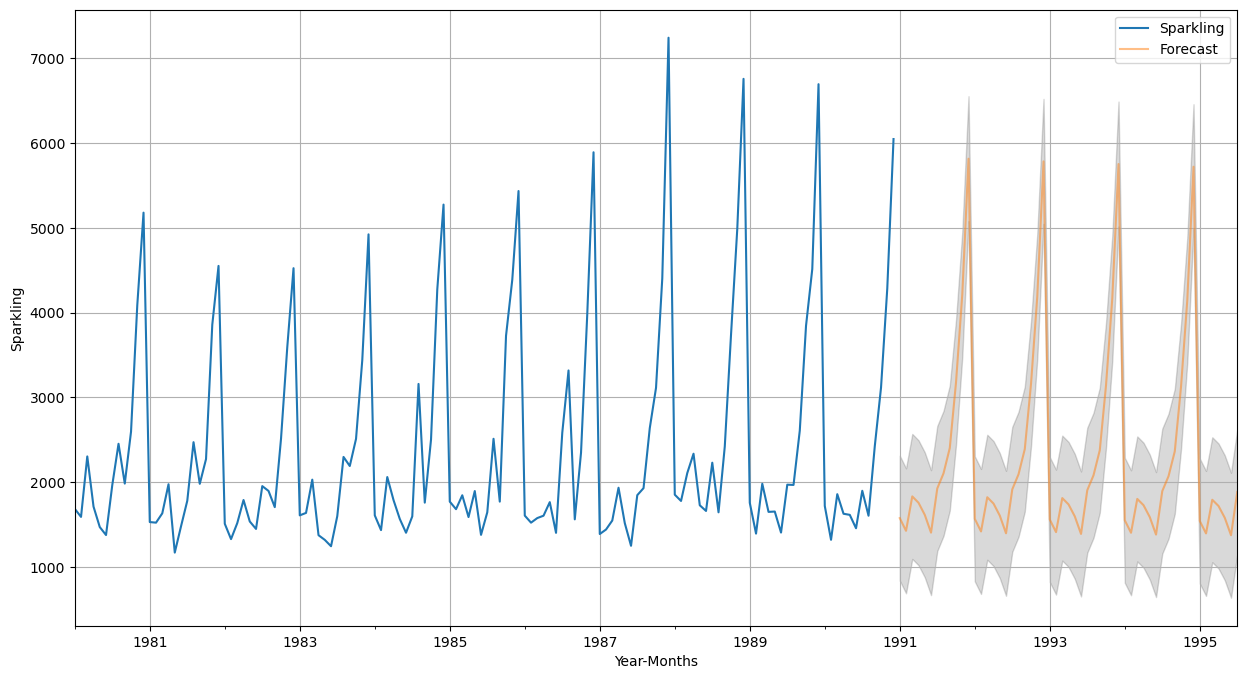

In [295]:
# plot the forecast along with the confidence band

axis = train.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**




In [296]:
from statsmodels.tsa.stattools import adfuller

df_sparkling = pd.DataFrame(sparkling_data['Sparkling'])
dftest = adfuller(df_sparkling)#python implementation of dicky fuller test 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [297]:
#failed to reject null hypothesis. time series data is non stationary

In [298]:
df_stationary = pd.DataFrame(df_sparkling['Sparkling'].diff().dropna())

In [299]:
df_stationary

Sparkling
YearMonth            
1980-02-01      -95.0
1980-03-01      713.0
1980-04-01     -592.0
1980-05-01     -241.0
1980-06-01      -94.0
...               ...
1995-03-01      495.0
1995-04-01      -35.0
1995-05-01     -192.0
1995-06-01       18.0
1995-07-01      343.0

[186 rows x 1 columns]

In [300]:
dftest = adfuller(df_stationary['Sparkling'])#python implementation of dicky fuller test 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



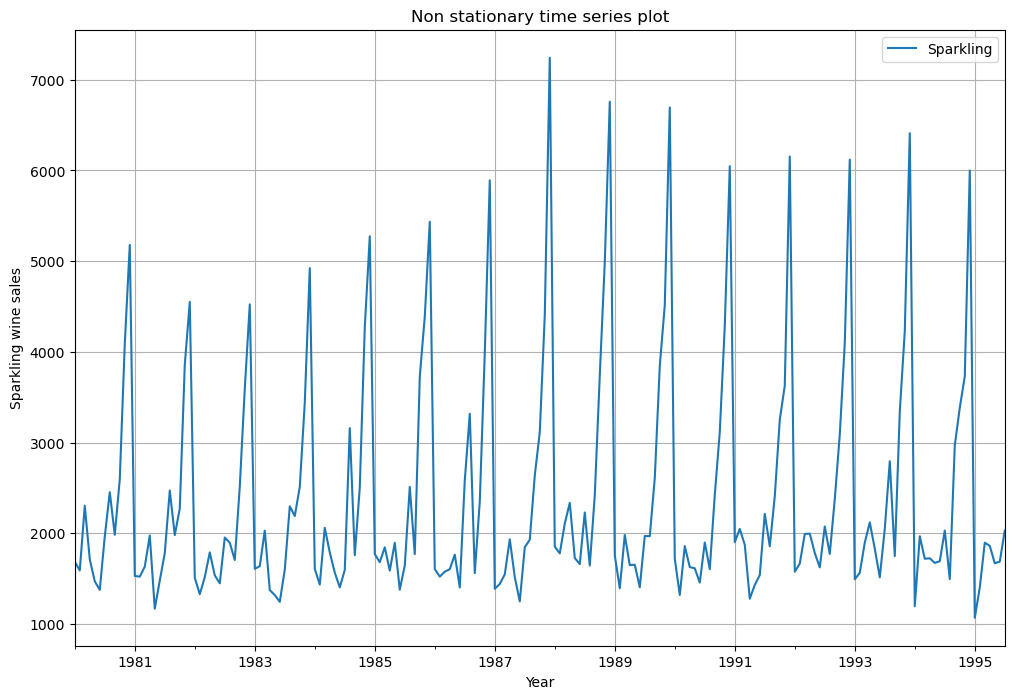

In [301]:
# reject null hypothesis, time series is stationary
sparkling_data['Sparkling'].plot();
plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.title('Non stationary time series plot')
plt.legend(loc='best')
plt.grid()
plt.show()

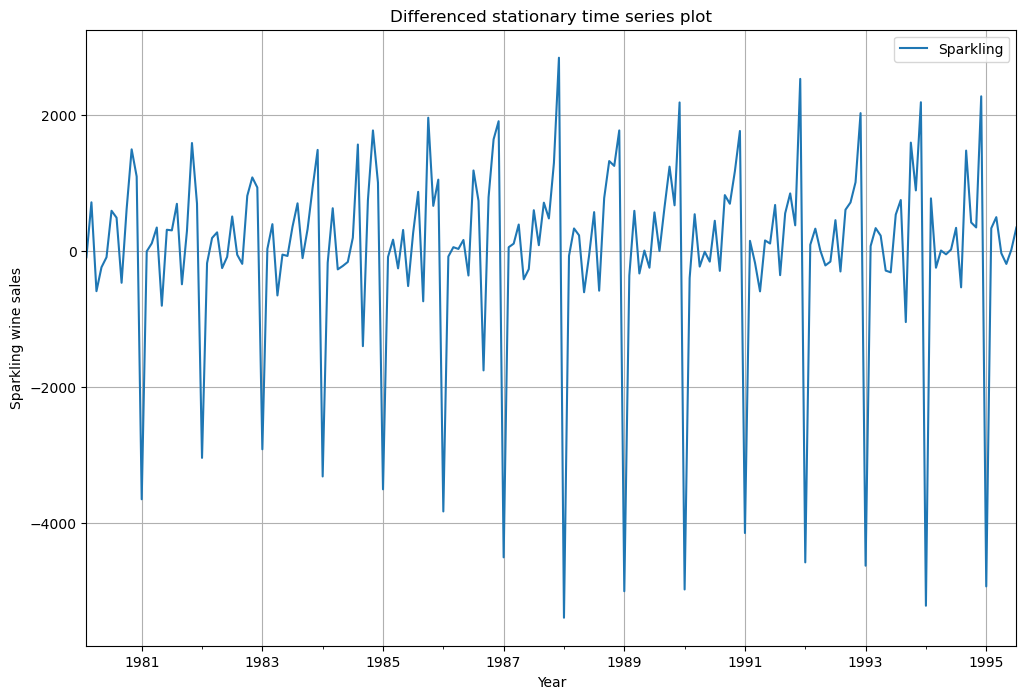

In [302]:
df_stationary['Sparkling'].plot()
plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.legend(loc='best')
plt.title('Differenced stationary time series plot')
plt.grid()
plt.show()

 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [303]:
#Building training and test data from the stationary time series in order to apply models.

In [304]:
sparkling_data.head()

Sparkling  Year Month
YearMonth                        
1980-01-01       1686  1980   Jan
1980-02-01       1591  1980   Feb
1980-03-01       2304  1980   Mar
1980-04-01       1712  1980   Apr
1980-05-01       1471  1980   May

In [305]:
sparkling_data.tail()

Sparkling  Year Month
YearMonth                        
1995-03-01       1897  1995   Mar
1995-04-01       1862  1995   Apr
1995-05-01       1670  1995   May
1995-06-01       1688  1995   Jun
1995-07-01       2031  1995   Jul

In [306]:
train = pd.DataFrame(sparkling_data[sparkling_data.index < '01-01-1991']['Sparkling'])
test = pd.DataFrame(sparkling_data[sparkling_data.index >= '01-01-1991']['Sparkling'])

In [307]:
## This is to display multiple data frames from one cell
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [308]:
train.shape

(132, 1)

In [309]:
#test stationarity of training data time series

dftest1 = adfuller(train['Sparkling'])#python implementation of dicky fuller test 
dftest1
dfoutput1 = pd.Series(dftest1[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest1[4].items():
    dfoutput1['Critical Value (%s)'%key] = value
print (dfoutput1,'\n')

Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



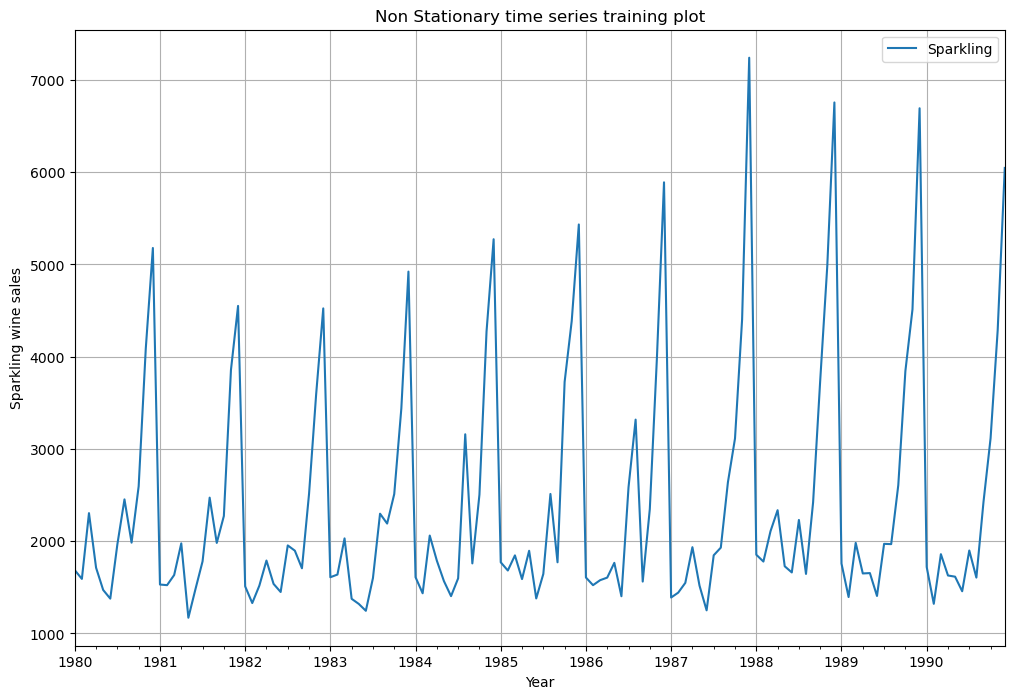

In [310]:
train['Sparkling'].plot()
plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.legend(loc='best')
plt.title('Non Stationary time series training plot')
plt.grid()
plt.show()

In [311]:
#train data is non stationary differencing it to make it stationary

train_differenced = pd.DataFrame(train['Sparkling'].diff().dropna())
train_differenced.head()

Sparkling
YearMonth            
1980-02-01      -95.0
1980-03-01      713.0
1980-04-01     -592.0
1980-05-01     -241.0
1980-06-01      -94.0

In [312]:
#test stationarity of training data time series

dftest1 = adfuller(train_differenced['Sparkling'])#python implementation of dicky fuller test 
dftest1
dfoutput1 = pd.Series(dftest1[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest1[4].items():
    dfoutput1['Critical Value (%s)'%key] = value
print (dfoutput1,'\n')

Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



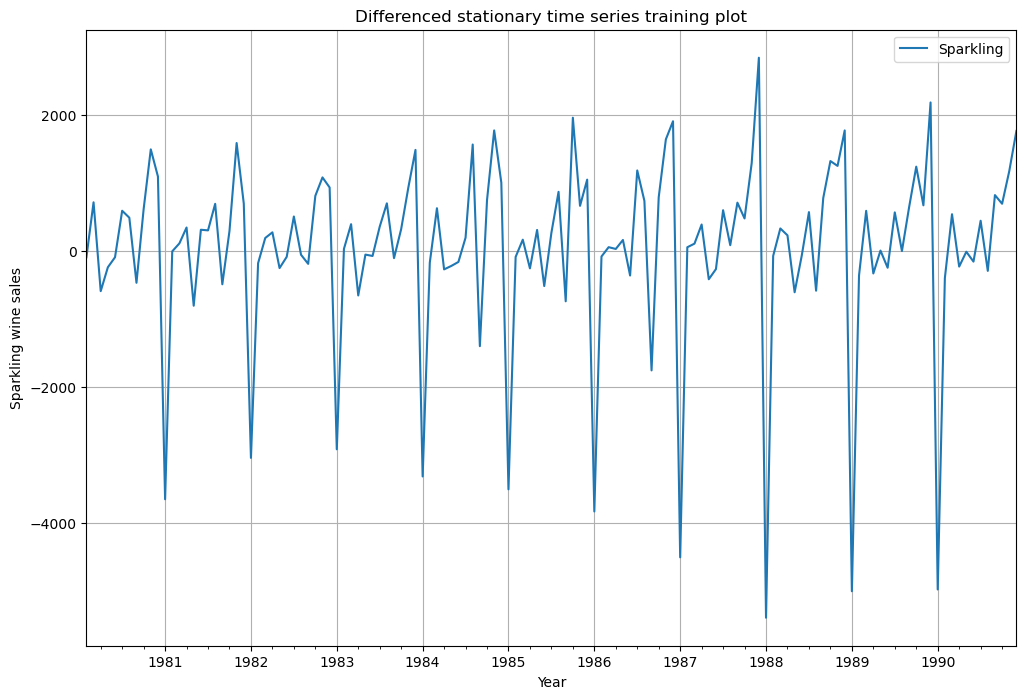

In [313]:
train_differenced['Sparkling'].plot()
plt.xlabel('Year')
plt.ylabel('Sparkling wine sales')
plt.legend(loc='best')
plt.title('Differenced stationary time series training plot')
plt.grid()
plt.show()

In [314]:
import itertools

p= range(0,5)
q = range(0,5)
d= range(0,5)
#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [315]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [316]:
#automated version of arima

# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [317]:
import warnings
warnings.filterwarnings('ignore')

In [318]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

ARIMA(0, 0, 0) - AIC:2271.2058190597454
ARIMA(0, 0, 1) - AIC:2245.312135662974
ARIMA(0, 0, 2) - AIC:2245.3471843301722
ARIMA(0, 0, 3) - AIC:2246.302013245936
ARIMA(0, 0, 4) - AIC:2244.7515383490036
ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323127107
ARIMA(0, 1, 3) - AIC:2233.994857776154
ARIMA(0, 1, 4) - AIC:2235.173736469662
ARIMA(0, 2, 0) - AIC:2359.060782054822
ARIMA(0, 2, 1) - AIC:2257.515942514732
ARIMA(0, 2, 2) - AIC:2253.5951275994494
ARIMA(0, 2, 3) - AIC:2227.7948587165924
ARIMA(0, 2, 4) - AIC:2226.1587791285247
ARIMA(0, 3, 0) - AIC:2481.0715186362363
ARIMA(0, 3, 1) - AIC:2347.3790898757234
ARIMA(0, 3, 2) - AIC:2250.8489256889616
ARIMA(0, 3, 3) - AIC:2247.7464677927305
ARIMA(0, 3, 4) - AIC:2225.2984965485616
ARIMA(0, 4, 0) - AIC:2614.00329606811
ARIMA(0, 4, 1) - AIC:2467.8941671126704
ARIMA(0, 4, 2) - AIC:2341.19837351489
ARIMA(0, 4, 3) - AIC:2247.4402258395935
ARIMA(0, 4, 4) - AIC:2258.8412873292946
ARIMA(1, 0, 

param          AIC
104  (4, 0, 4)  2192.432126
79   (3, 0, 4)  2201.407315
53   (2, 0, 3)  2205.695049
78   (3, 0, 3)  2209.251589
103  (4, 0, 3)  2211.840116

In [319]:
#### <u>Building ARIMA model with best parameters p,d,q</u>

best_model = ARIMA(train['Sparkling'],order = (4,0,4), freq='MS')
best_results = best_model.fit()

print(best_results.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1086.216
Date:                Sat, 05 Aug 2023   AIC                           2192.432
Time:                        14:57:01   BIC                           2221.260
Sample:                    01-01-1980   HQIC                          2204.147
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2403.7689     99.522     24.153      0.000    2208.710    2598.828
ar.L1          0.6996      0.133      5.277      0.000       0.440       0.959
ar.L2          0.0574      0.185      0.310      0.7

In [320]:
test_predicted = best_results.forecast(steps=len(test))#forecasting values 
test_predicted.head()

1991-01-01    3519.390427
1991-02-01    1951.626611
1991-03-01    1389.978322
1991-04-01    1080.924594
1991-05-01     550.144243
Freq: MS, Name: predicted_mean, dtype: float64

In [321]:
testCopy1 = test.copy()
#invdy=cumsum(c(y[1],dy))
testCopy1['sparkling_forecasted'] = test_predicted
testCopy1.head()

Sparkling  sparkling_forecasted
YearMonth                                  
1991-01-01       1902           3519.390427
1991-02-01       2049           1951.626611
1991-03-01       1874           1389.978322
1991-04-01       1279           1080.924594
1991-05-01       1432            550.144243

In [322]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sparkling_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1011.472


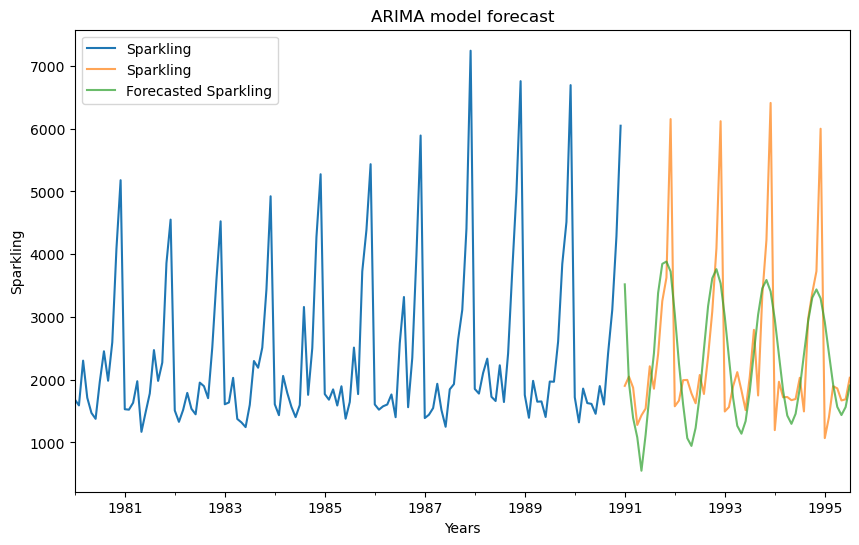

In [323]:
axis = train['Sparkling'].plot(label='Sparkling', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Sparkling', alpha=0.7)
testCopy1['sparkling_forecasted'].plot(ax=axis, label='Forecasted Sparkling', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.title('ARIMA model forecast')
plt.legend(loc='best')
plt.show()
plt.close()

In [324]:
resultsDf2 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(4,0,4)'])

resultsDf2
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   404.286809
2pointTrailingMovingAverage                          813.400684
Best ARIMA Model : ARIMA(4,0,4)                     1011.471574
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

In [325]:
#Automated SARIMA model

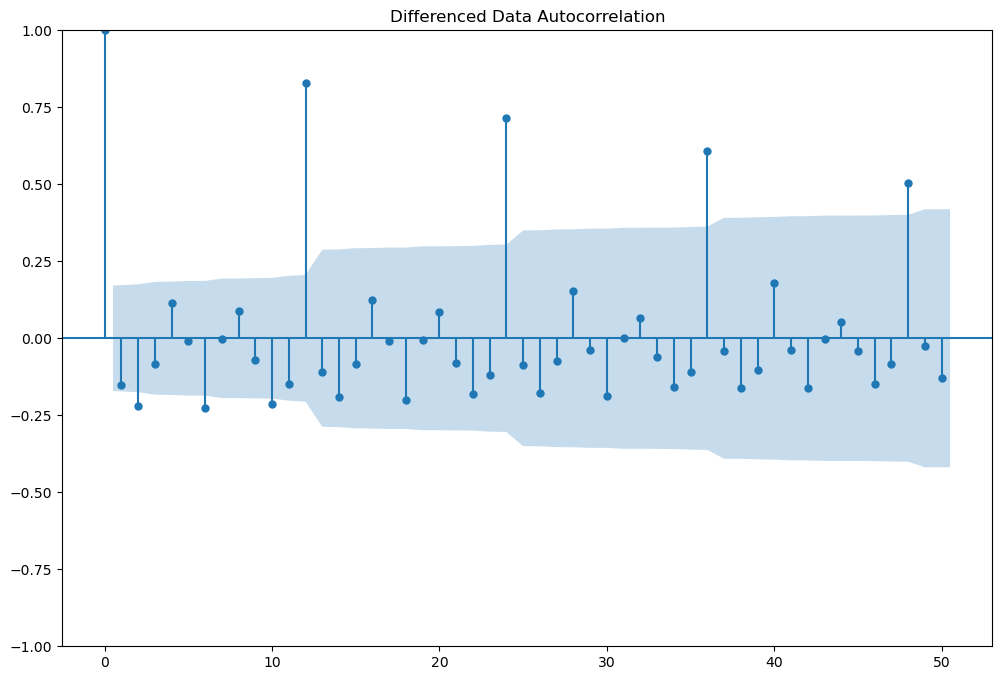

In [326]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [143]:
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [144]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [145]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA_AIC.sort_values(by=['AIC']).head()

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536891213
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154974516
SARIMA(0, 1, 0)x(0, 0, 4, 6) - AIC:1724.3155352364115
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443106
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360121987213
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094954456
SARIMA(0, 1, 0)x(1, 0, 4, 6) - AIC:1696.0839512311782
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510718
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805658053
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.537642554952
SARIMA(0, 1, 0)x(2, 0, 4, 6) - AIC:1636.4684773232511
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816735
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858031789
SARIMA(0, 1, 0)x(3, 0, 3, 6) - A

SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:1814.6532925061636
SARIMA(1, 1, 1)x(0, 0, 4, 6) - AIC:1681.9224131382841
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2109.6671209727765
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2005.6125662247443
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1856.0775242707061
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:1736.750528686679
SARIMA(1, 1, 1)x(1, 0, 4, 6) - AIC:1630.4046957552853
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1776.9417677008048
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1778.8222557863778
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1743.3797779874299
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:1660.7244253130682
SARIMA(1, 1, 1)x(2, 0, 4, 6) - AIC:1576.9119825211474
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:1689.9510871757757
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:1686.5999736957433
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:1674.3183064091086
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:1662.6313726480305
SARIMA(1, 1, 1)x(3, 0, 4, 6) - AIC:1578.9590550486193
SARIMA(1, 1, 1)x(4, 0, 0, 6) - AIC:1594.4228513990777
SARIMA(1, 1, 1)x(4, 0, 1, 6) 

SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058949749483
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1826.0433799161065
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1715.8105810172494
SARIMA(2, 1, 2)x(1, 0, 4, 6) - AIC:1617.3032700552385
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2862427317143
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.8267439831
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.1898349554717
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:1647.288295401887
SARIMA(2, 1, 2)x(2, 0, 4, 6) - AIC:1563.7116716065866
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:1676.1266570764456
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:1681.2423972040035
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:1663.5157768662832
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:1649.3704192154669
SARIMA(2, 1, 2)x(3, 0, 4, 6) - AIC:1564.3759750273225
SARIMA(2, 1, 2)x(4, 0, 0, 6) - AIC:1628.721267769285
SARIMA(2, 1, 2)x(4, 0, 1, 6) - AIC:1576.9668044180187
SARIMA(2, 1, 2)x(4, 0, 2, 6) - AIC:1578.083096810046
SARIMA(2, 1, 2)x(4, 0, 3, 6) - AIC:1580.1889925108599
SARIMA(2, 1, 2)x(4, 0, 4, 6) - AIC

SARIMA(3, 1, 3)x(1, 0, 4, 6) - AIC:1595.4784182387712
SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:1743.3191481399908
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1745.0634084566
SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:1719.71815847837
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:1634.4746211025238
SARIMA(3, 1, 3)x(2, 0, 4, 6) - AIC:1548.1364796253872
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:1661.120008773546
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:1656.9001520776546
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:1644.5753755563167
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:1640.5031509213215
SARIMA(3, 1, 3)x(3, 0, 4, 6) - AIC:1553.835179109407
SARIMA(3, 1, 3)x(4, 0, 0, 6) - AIC:1567.5302877167314
SARIMA(3, 1, 3)x(4, 0, 1, 6) - AIC:1569.4492428241483
SARIMA(3, 1, 3)x(4, 0, 2, 6) - AIC:1649.179153785145
SARIMA(3, 1, 3)x(4, 0, 3, 6) - AIC:1569.3746264098559
SARIMA(3, 1, 3)x(4, 0, 4, 6) - AIC:1550.0056036442013
SARIMA(3, 1, 4)x(0, 0, 0, 6) - AIC:2134.0268806351587
SARIMA(3, 1, 4)x(0, 0, 1, 6) - AIC:2038.171067247485
SARIMA(3, 1, 4)x(0, 0, 2, 6) - AIC:18

SARIMA(4, 1, 4)x(2, 0, 2, 6) - AIC:1702.125885384473
SARIMA(4, 1, 4)x(2, 0, 3, 6) - AIC:1621.2721650156059
SARIMA(4, 1, 4)x(2, 0, 4, 6) - AIC:1537.740297364954
SARIMA(4, 1, 4)x(3, 0, 0, 6) - AIC:1647.965108195201
SARIMA(4, 1, 4)x(3, 0, 1, 6) - AIC:1655.5290372491322
SARIMA(4, 1, 4)x(3, 0, 2, 6) - AIC:1640.8860157108486
SARIMA(4, 1, 4)x(3, 0, 3, 6) - AIC:1626.329636094348
SARIMA(4, 1, 4)x(3, 0, 4, 6) - AIC:1541.8303890133884
SARIMA(4, 1, 4)x(4, 0, 0, 6) - AIC:1553.6385629179424
SARIMA(4, 1, 4)x(4, 0, 1, 6) - AIC:1553.0378841448194
SARIMA(4, 1, 4)x(4, 0, 2, 6) - AIC:1555.3291844241753
SARIMA(4, 1, 4)x(4, 0, 3, 6) - AIC:1552.445942676774
SARIMA(4, 1, 4)x(4, 0, 4, 6) - AIC:1559.775603462519


param      seasonal          AIC
364  (2, 1, 4)  (2, 0, 4, 6)  1534.798401
114  (0, 1, 4)  (2, 0, 4, 6)  1535.344780
239  (1, 1, 4)  (2, 0, 4, 6)  1535.645847
489  (3, 1, 4)  (2, 0, 4, 6)  1536.507068
124  (0, 1, 4)  (4, 0, 4, 6)  1537.199250

In [327]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 4),
                                seasonal_order=(2, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(2, 0, 4, 6)   Log Likelihood                -754.399
Date:                           Sat, 05 Aug 2023   AIC                           1534.798
Time:                                   14:57:29   BIC                           1568.923
Sample:                                        0   HQIC                          1548.617
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6592      0.140    -11.885      0.000      -1.933      -1.386
ar.L2         -0.8481      0.120     -7.065

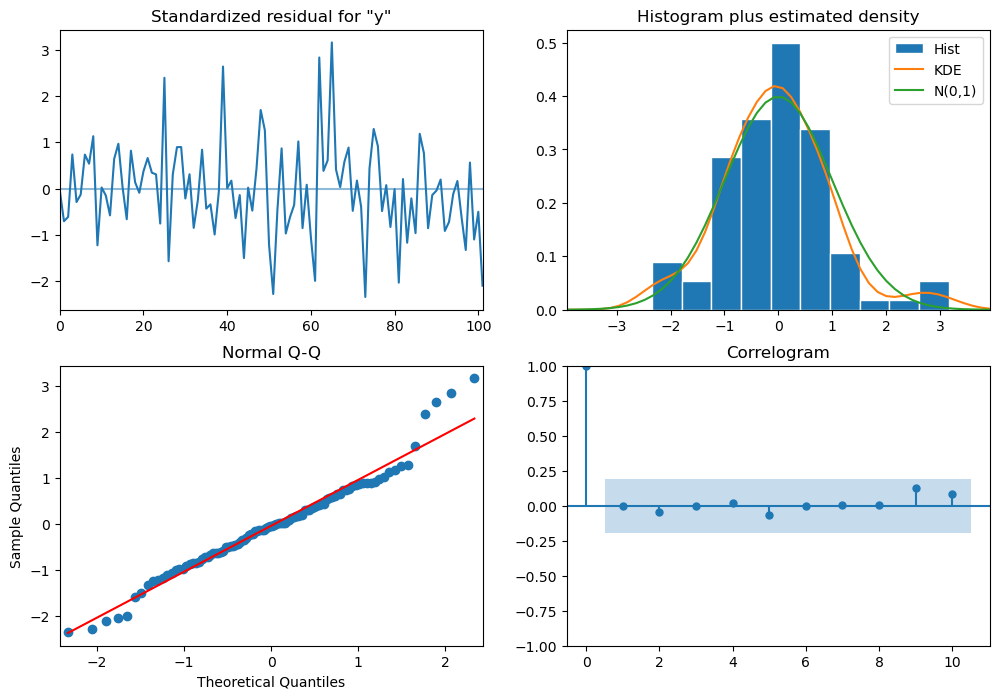

In [328]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [329]:
## Predict on the Test Set using this model and evaluate the model.

predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

rmse = metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

666.3208168133657


In [330]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2,1,4)(2,0,4,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   404.286809
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Best ARIMA Model : ARIMA(4,0,4)                     1011.471574
SARIMA(2,1,4)(2,0,4,6)                               666.320817

In [180]:
#Automated SARIMA with seasonal parameter 12

p = q = range(1, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [181]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [182]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5449249717342
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863524445
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:14.0
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142243137936
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968354462
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:883.122682099611
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502498787265
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1416.7323619397723
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3175.3938708096593
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.995218542722
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842470644764
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4193.55388046748
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5115794798453
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.0767769152767
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:6844.516197168525
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.914697455726
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9615947343182
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3998.163175465116
SARIMA(1, 1, 3)x(1, 0, 1, 12) - 

param       seasonal   AIC
2   (1, 1, 1)  (1, 0, 3, 12)  14.0
20  (1, 1, 3)  (1, 0, 3, 12)  18.0
47  (2, 1, 3)  (1, 0, 3, 12)  20.0
65  (3, 1, 2)  (1, 0, 3, 12)  20.0
68  (3, 1, 2)  (2, 0, 3, 12)  22.0

In [331]:
SARIMA_AIC.sort_values(by=['AIC']).head(15)

param       seasonal          AIC
2   (1, 1, 1)  (1, 0, 3, 12)    14.000000
20  (1, 1, 3)  (1, 0, 3, 12)    18.000000
47  (2, 1, 3)  (1, 0, 3, 12)    20.000000
65  (3, 1, 2)  (1, 0, 3, 12)    20.000000
68  (3, 1, 2)  (2, 0, 3, 12)    22.000000
77  (3, 1, 3)  (2, 0, 3, 12)    24.000000
23  (1, 1, 3)  (2, 0, 3, 12)    95.963384
5   (1, 1, 1)  (2, 0, 3, 12)   883.122682
69  (3, 1, 2)  (3, 0, 1, 12)  1388.602614
60  (3, 1, 1)  (3, 0, 1, 12)  1388.681497
61  (3, 1, 1)  (3, 0, 2, 12)  1389.195899
70  (3, 1, 2)  (3, 0, 2, 12)  1389.702000
78  (3, 1, 3)  (3, 0, 1, 12)  1390.535977
79  (3, 1, 3)  (3, 0, 2, 12)  1392.632812
51  (2, 1, 3)  (3, 0, 1, 12)  1400.119862

In [332]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(3, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [1], 12)   Log Likelihood                -684.301
Date:                              Sat, 05 Aug 2023   AIC                           1388.603
Time:                                      14:59:13   BIC                           1413.820
Sample:                                  01-01-1980   HQIC                          1398.781
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5433      0.416     -1.306      0.192      -1.359       0.272
ar.L2         -0.00

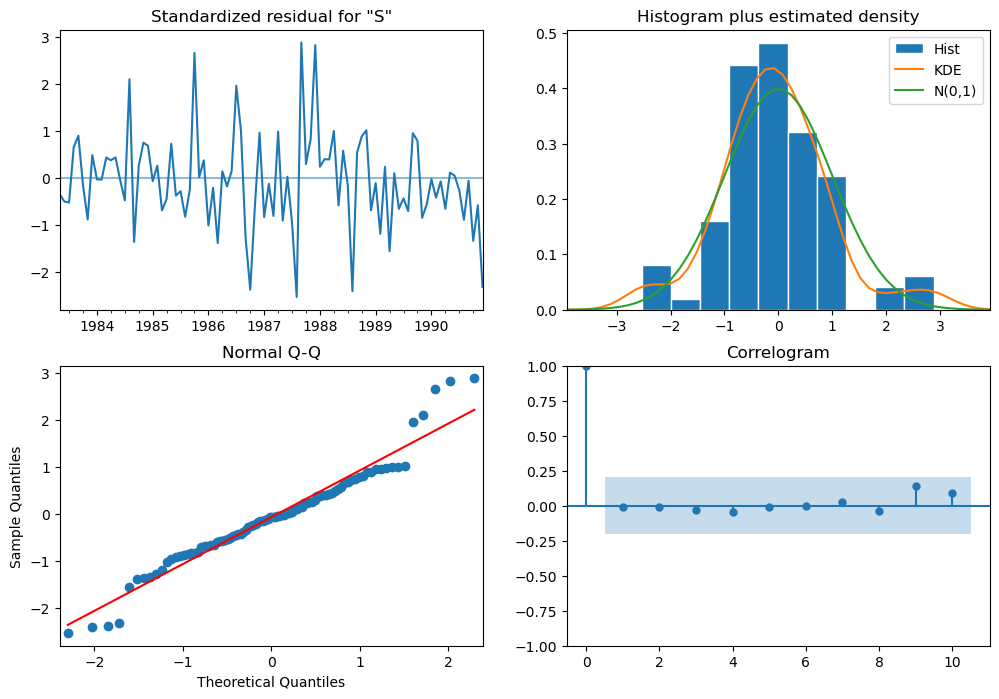

In [333]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [334]:
## Predict on the Test Set using this model and evaluate the model.

predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1320.319125  407.878186     520.892570    2119.745680
1991-02-01  1298.568720  421.171952     473.086862    2124.050578
1991-03-01  1604.435992  421.172386     778.953284    2429.918701
1991-04-01  1625.976998  429.668416     783.842378    2468.111618
1991-05-01  1397.847814  430.136023     554.796701    2240.898928

In [335]:
# Compute the root mean square error
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

580.0568461111361


In [336]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(3,0,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   404.286809
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Best ARIMA Model : ARIMA(4,0,4)                     1011.471574
SARIMA(2,1,4)(2,0,4,6)                               666.320817
SARIMA(3,1,2)(3,0,1,12)                              580.056846

In [345]:
#Build a table with all the models built along with their corresponding parameters and the 
#respective RMSE values on the test data.

results_Df_All = resultsDf.copy()
results_Df_All.index.name = 'Forecasting with parameter values'
results_Df_All.sort_values(by = 'Test RMSE', ascending = True)

Test RMSE
Forecasting with parameter values                              
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   404.286809
SARIMA(3,1,2)(3,0,1,12)                              580.056846
SARIMA(2,1,4)(2,0,4,6)                               666.320817
2pointTrailingMovingAverage                          813.400684
Best ARIMA Model : ARIMA(4,0,4)                     1011.471574
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0496,SimpleExponentialSmoothing             1316.035487
Alpha =0.688, Beta = 0.00009,DoubleExponentialS...  1316.035487
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

In [348]:
## Building the most optimum model on the Full Data.

#* Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing

fullmodel1 = ExponentialSmoothing(sparkling_data['Sparkling'],
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

RMSE_fullmodel1 = metrics.mean_squared_error(sparkling_data['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 376.7746175142995


In [349]:
# Getting the predictions for the same number of times stamps that are present in the test data
final_prediction = fullmodel1.forecast(steps=12)

In [354]:
df = pd.DataFrame(final_prediction, columns = ['Sparkling future predictions'])
df

Sparkling future predictions
1995-08-01                   2063.448803
1995-09-01                   2579.407389
1995-10-01                   3416.654268
1995-11-01                   4304.477169
1995-12-01                   6604.876647
1996-01-01                   1564.539777
1996-02-01                   1849.759980
1996-03-01                   2098.878830
1996-04-01                   2022.428830
1996-05-01                   1834.540687
1996-06-01                   1712.408933
1996-07-01                   2176.425361

Text(0.5, 1.0, 'Sparkling wines sales forecast')

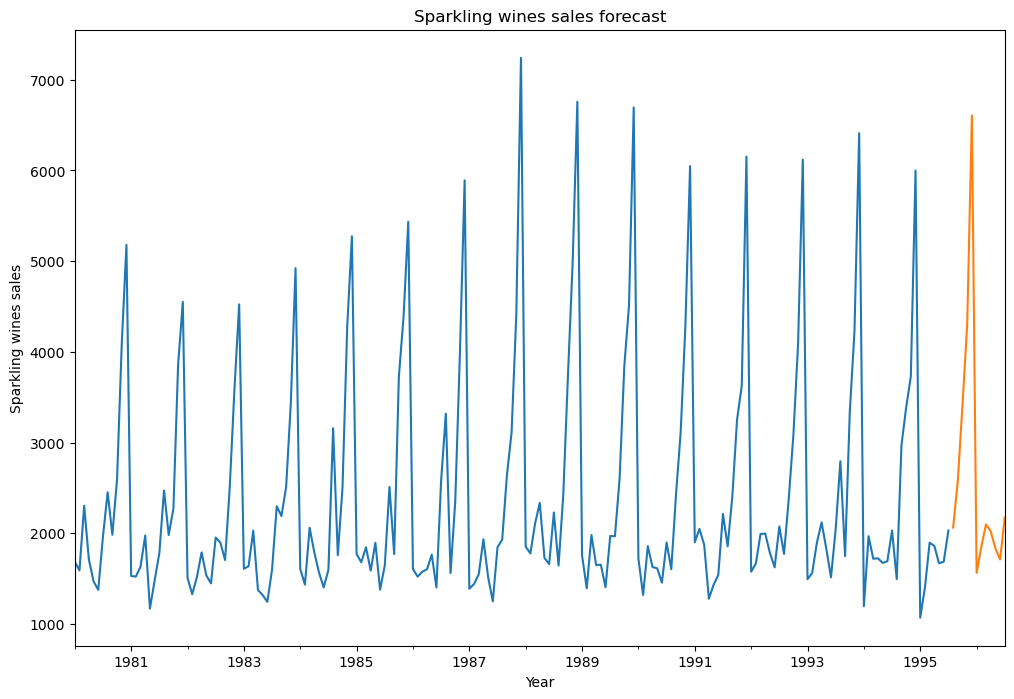

In [355]:
sparkling_data['Sparkling'].plot()
final_prediction.plot();
plt.xlabel('Year')
plt.ylabel('Sparkling wines sales')
plt.title('Sparkling wines sales forecast')

In [356]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':final_prediction - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':final_prediction,
                          'upper_ci': final_prediction + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df

lower_CI   prediction     upper_ci
1995-08-01  1322.989138  2063.448803  2803.908469
1995-09-01  1838.947723  2579.407389  3319.867055
1995-10-01  2676.194602  3416.654268  4157.113934
1995-11-01  3564.017503  4304.477169  5044.936834
1995-12-01  5864.416981  6604.876647  7345.336312
1996-01-01   824.080112  1564.539777  2304.999443
1996-02-01  1109.300314  1849.759980  2590.219645
1996-03-01  1358.419164  2098.878830  2839.338496
1996-04-01  1281.969164  2022.428830  2762.888495
1996-05-01  1094.081021  1834.540687  2575.000352
1996-06-01   971.949267  1712.408933  2452.868599
1996-07-01  1435.965695  2176.425361  2916.885027

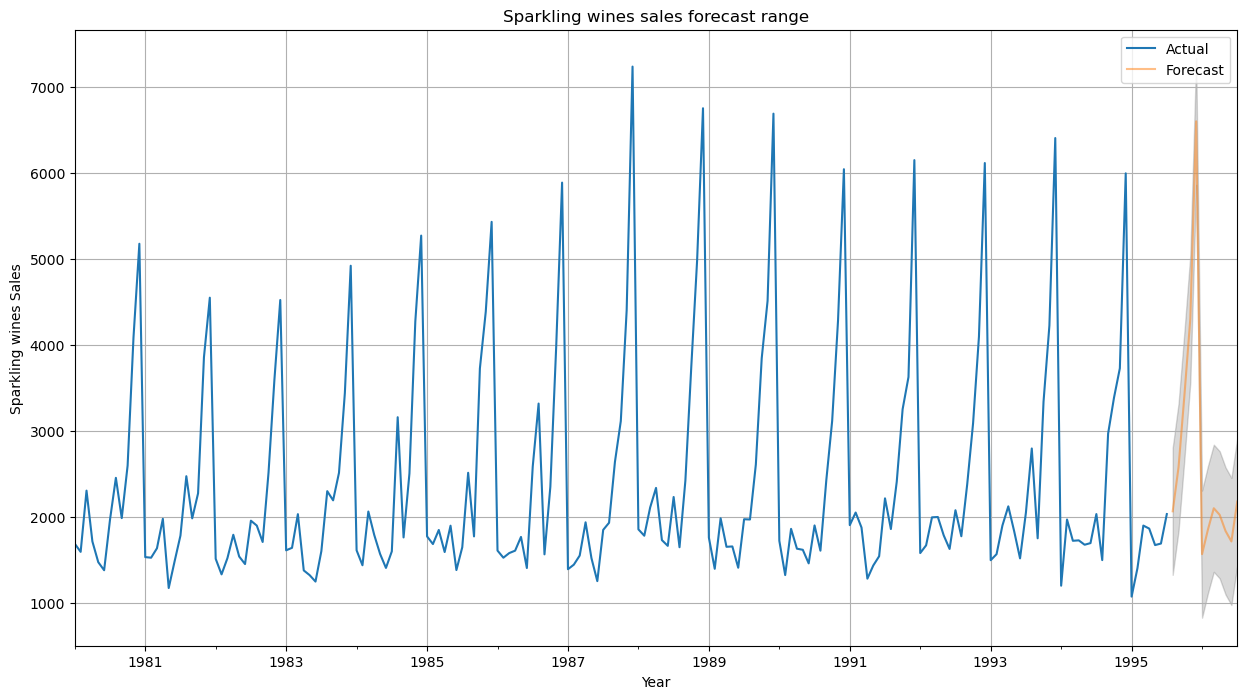

In [357]:
# plot the forecast along with the confidence band

axis = sparkling_data['Sparkling'].plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sparkling wines Sales')
plt.title('Sparkling wines sales forecast range')
plt.legend(loc='best')
plt.grid()
plt.show()